In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
import pandas as pdrestar
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
#from sklearn_extra.cluster import KMedoids
#from sklearn_extra.kernel_methods import EigenProRegressor

In [7]:
# If you saved as CSV:
df = pd.read_csv('processed_ABCDEats_data.csv')

# Or if you saved as pickle:
#df = pd.read_pickle('processed_ABCDEats_data.pkl')

df_original =  pd.read_csv('original_ABCDEats_data.csv')



/tmp/ipykernel_98/2260363746.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original =  pd.read_csv('original_ABCDEats_data.csv')


In [8]:
df

customer_id   customer_region  customer_age  vendor_count  \
0      1b8f824d5e    2360                        18             2   
1      5d272b9dcb    8670                        17             2   
2      f6d1b2ba63    4660                        38             1   
3      180c632ed8    4660                        24             2   
4      4eb37a6705    4660                        20             2   
...             ...               ...           ...           ...   
31732  f4e366c281    8670                        30             1   
31733  f6b6709018    8670                        27             1   
31734  f74ad8ce3f    8670                        24             1   
31735  f7b19c0241    8670                        34             1   
31736  fd40d3b0e0    4660                        30             1   

       product_count  is_chain  first_order  last_order   last_promo  \
0                  5         1            0           1  DELIVERY      
1                  2         2            0           1  DISCOUNT      
2                  2         2            0           1  DISCOUNT      
3                  3         1            0           2  DELIVERY      
4                  5         0            0           2  -             
...              ...       ...          ...         ...          ...   
31732              1         1           34           0  FREEBIE       
31733              1         0           28           0  DELIVERY      
31734              1         1           12           0  -             
31735              1         0            7           0  DISCOUNT      
31736              1         0           34           0  -             

        payment_method  ...  weekend_ratio  lunch_orders  dinner_orders  \
0      DIGI             ...            1.0             0              2   
1      DIGI             ...            1.0             1              0   
2      CASH             ...            1.0             1              0   
3      DIGI             ...            0.5             1              0   
4      DIGI             ...            0.5             0              0   
...                ...  ...            ...           ...            ...   
31732  DIGI             ...            1.0             1              0   
31733  DIGI             ...            1.0             0              0   
31734  DIGI             ...            1.0             0              0   
31735  DIGI             ...            1.0             1              0   
31736  CASH             ...            1.0             0              0   

       meal_preference  morning_orders  midday_orders  evening_orders  \
0               dinner               0              0               2   
1                lunch               1              1               0   
2                lunch               1              1               0   
3                lunch               0              2               0   
4               dinner               2              0               0   
...                ...             ...            ...             ...   
31732            lunch               0              1               0   
31733           dinner               0              0               1   
31734           dinner               0              0               0   
31735            lunch               0              1               0   
31736           dinner               0              0               1   

       night_orders  drinking_orders  primary_time_period  
0                 0                0              evening  
1                 0                0              morning  
2                 0                0              morning  
3                 0                0               midday  
4                 0                0              morning  
...             ...              ...                  ...  
31732             0                0               midday  
31733             0                0              evenin

# Creating DF_Dropped

## DF_Dropped: + new features, - summed up features

In [9]:
# Make a copy of the original DataFrame
#df_dropped = df

# Identify columns that start with 'HR_', 'DOW_', or 'CUI_', we summed them to new features
columns_to_drop = df.filter(like='HR_').columns.tolist() + \
                  df.filter(like='DOW_').columns.tolist() #+ \
                 # ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']
# Print the columns to be dropped for verification
print("Columns to be dropped:", columns_to_drop)

# Drop the identified columns from the copied DataFrame
df_dropped = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df_dropped

Columns to be dropped: ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']


customer_id   customer_region  customer_age  vendor_count  \
0      1b8f824d5e    2360                        18             2   
1      5d272b9dcb    8670                        17             2   
2      f6d1b2ba63    4660                        38             1   
3      180c632ed8    4660                        24             2   
4      4eb37a6705    4660                        20             2   
...             ...               ...           ...           ...   
31732  f4e366c281    8670                        30             1   
31733  f6b6709018    8670                        27             1   
31734  f74ad8ce3f    8670                        24             1   
31735  f7b19c0241    8670                        34             1   
31736  fd40d3b0e0    4660                        30             1   

       product_count  is_chain  first_order  last_order   last_promo  \
0                  5         1            0           1  DELIVERY      
1                  2         2            0           1  DISCOUNT      
2                  2         2            0           1  DISCOUNT      
3                  3         1            0           2  DELIVERY      
4                  5         0            0           2  -             
...              ...       ...          ...         ...          ...   
31732              1         1           34           0  FREEBIE       
31733              1         0           28           0  DELIVERY      
31734              1         1           12           0  -             
31735              1         0            7           0  DISCOUNT      
31736              1         0           34           0  -             

        payment_method  ...  weekend_ratio  lunch_orders  dinner_orders  \
0      DIGI             ...            1.0             0              2   
1      DIGI             ...            1.0             1              0   
2      CASH             ...            1.0             1              0   
3      DIGI             ...            0.5             1              0   
4      DIGI             ...            0.5             0              0   
...                ...  ...            ...           ...            ...   
31732  DIGI             ...            1.0             1              0   
31733  DIGI             ...            1.0             0              0   
31734  DIGI             ...            1.0             0              0   
31735  DIGI             ...            1.0             1              0   
31736  CASH             ...            1.0             0              0   

       meal_preference  morning_orders  midday_orders  evening_orders  \
0               dinner               0              0               2   
1                lunch               1              1               0   
2                lunch               1              1               0   
3                lunch               0              2               0   
4               dinner               2              0               0   
...                ...             ...            ...             ...   
31732            lunch               0              1               0   
31733           dinner               0              0               1   
31734           dinner               0              0               0   
31735            lunch               0              1               0   
31736           dinner               0              0               1   

       night_orders  drinking_orders  primary_time_period  
0                 0                0              evening  
1                 0                0              morning  
2                 0                0              morning  
3                 0                0               midday  
4                 0                0              morning  
...             ...              ...                  ...  
31732             0                0               midday  
31733             0                0              evenin

In [10]:
df_dropped

customer_id   customer_region  customer_age  vendor_count  \
0      1b8f824d5e    2360                        18             2   
1      5d272b9dcb    8670                        17             2   
2      f6d1b2ba63    4660                        38             1   
3      180c632ed8    4660                        24             2   
4      4eb37a6705    4660                        20             2   
...             ...               ...           ...           ...   
31732  f4e366c281    8670                        30             1   
31733  f6b6709018    8670                        27             1   
31734  f74ad8ce3f    8670                        24             1   
31735  f7b19c0241    8670                        34             1   
31736  fd40d3b0e0    4660                        30             1   

       product_count  is_chain  first_order  last_order   last_promo  \
0                  5         1            0           1  DELIVERY      
1                  2         2            0           1  DISCOUNT      
2                  2         2            0           1  DISCOUNT      
3                  3         1            0           2  DELIVERY      
4                  5         0            0           2  -             
...              ...       ...          ...         ...          ...   
31732              1         1           34           0  FREEBIE       
31733              1         0           28           0  DELIVERY      
31734              1         1           12           0  -             
31735              1         0            7           0  DISCOUNT      
31736              1         0           34           0  -             

        payment_method  ...  weekend_ratio  lunch_orders  dinner_orders  \
0      DIGI             ...            1.0             0              2   
1      DIGI             ...            1.0             1              0   
2      CASH             ...            1.0             1              0   
3      DIGI             ...            0.5             1              0   
4      DIGI             ...            0.5             0              0   
...                ...  ...            ...           ...            ...   
31732  DIGI             ...            1.0             1              0   
31733  DIGI             ...            1.0             0              0   
31734  DIGI             ...            1.0             0              0   
31735  DIGI             ...            1.0             1              0   
31736  CASH             ...            1.0             0              0   

       meal_preference  morning_orders  midday_orders  evening_orders  \
0               dinner               0              0               2   
1                lunch               1              1               0   
2                lunch               1              1               0   
3                lunch               0              2               0   
4               dinner               2              0               0   
...                ...             ...            ...             ...   
31732            lunch               0              1               0   
31733           dinner               0              0               1   
31734           dinner               0              0               0   
31735            lunch               0              1               0   
31736           dinner               0              0               1   

       night_orders  drinking_orders  primary_time_period  
0                 0                0              evening  
1                 0                0              morning  
2                 0                0              morning  
3                 0                0               midday  
4                 0                0              morning  
...             ...              ...                  ...  
31732             0                0               midday  
31733             0                0              evenin

In [11]:
feature_names = df_dropped.columns.tolist()

# Print the feature names
print("Feature names:", feature_names)

Feature names: ['customer_id', 'customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'total_spending', 'total_orders', 'cuisine_diversity', 'primary_cuisine', 'weekend_orders', 'underweekend_orders', 'weekend_ratio', 'lunch_orders', 'dinner_orders', 'meal_preference', 'morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'drinking_orders', 'primary_time_period']


## Small EDA for DF_Dropped

In [12]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31737 non-null  object 
 1   customer_region           31737 non-null  object 
 2   customer_age              31737 non-null  int64  
 3   vendor_count              31737 non-null  int64  
 4   product_count             31737 non-null  int64  
 5   is_chain                  31737 non-null  int64  
 6   first_order               31737 non-null  int64  
 7   last_order                31737 non-null  int64  
 8   last_promo                31737 non-null  object 
 9   payment_method            31737 non-null  object 
 10  CUI_American              31737 non-null  int64  
 11  CUI_Asian                 31737 non-null  int64  
 12  CUI_Beverages             31737 non-null  int64  
 13  CUI_Cafe                  31737 non-null  int64  
 14  CUI_Ch

In [13]:
# Assuming df is your DataFrame
# Select only numerical columns
#numerical_df = df_dropped.select_dtypes(include=['number'])

# Plot each numerical column
#numerical_df.hist(bins=15, figsize=(15, 10), layout=(len(numerical_df.columns) // 3 + 1, 3))
#plt.tight_layout()
#plt.show()



<img src="Visualizations/Distributions Numerical.png" width="" align="" />

In [14]:
# Create horizontal boxplots for each numerical column with a larger figure size
#numerical_df.plot(kind='box', subplots=True, layout=(len(numerical_df.columns) // 2 + 1, 2), figsize=(15, 20), sharex=False, sharey=False, vert=False)
#plt.tight_layout()
#plt.show()

<img src="Visualizations/Boxplots Numerical.png" width="" align="" />

In [15]:
# Create a pairplot with customized colors for the points
#pairplot = sns.pairplot(numerical_df, plot_kws={'color': 'black'})

# Customize the y-axis points to be blue
#for ax in pairplot.axes.flatten():
    #if ax is not None:
     #   ax.yaxis.label.set_color('blue')
       # for label in ax.get_yticklabels():
      #      label.set_color('blue')

#plt.show()

<img src="Visualizations/PairPlot Numerical.png" width="" align="" />

# One Hot Encoding

In [16]:
#One-hot encode categorical features

#One-hot encode

# Select categorical variables
#df_cat = df.select_dtypes(include=[np.object])

# Initialize the OneHotEncoder
#encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical variables
#encoded_array = encoder.fit_transform(df_cat)

# Convert the encoded array to a DataFrame
#encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df_cat.columns), index=df.index)

# Combine with the rest of the original DataFrame
#df_encoded = pd.concat([df.drop(columns=df_cat.columns), encoded_df], axis=1)

#print(df_encoded.head())


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def preprocess_features(df_dropped):
    """
    Preprocess features including scaling numerical features and encoding categoricals
    """
    # Identify numeric and categorical columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['object']).columns
    
    # Remove identifier columns that shouldn't be used for clustering
    columns_to_drop = ['customer_id']
    numeric_features = numeric_features.drop(columns_to_drop) if any(x in numeric_features for x in columns_to_drop) else numeric_features
    categorical_features = categorical_features.drop(columns_to_drop) if any(x in categorical_features for x in columns_to_drop) else categorical_features
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Scale numeric features
    df_scaled = df.copy()
    df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    # One-hot encode categorical variables
    # Using pd.get_dummies() for simplicity, could use sklearn's OneHotEncoder for more control
    df_encoded = pd.get_dummies(df_scaled, columns=categorical_features, drop_first=True)
    
    return df_encoded

def get_clustering_features(df_encoded):
    """
    Select and return relevant features for clustering
    """
    # List of features to exclude from clustering
    exclude_features = [
        'customer_id',  # Identifier
        'first_order',  # Already captured in other features
        'last_order',   # Already captured in other features
    ]

    
    
    # Get feature columns excluding the ones we don't want
    clustering_features = [col for col in df_encoded.columns if col not in exclude_features]
    
    return df_encoded[clustering_features]


# Example usage:
preprocessed_df = preprocess_features(df)
clustering_features_df = get_clustering_features(preprocessed_df)

In [18]:
df_dropped.head(10)

customer_id   customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e    2360                        18             2              5   
1  5d272b9dcb    8670                        17             2              2   
2  f6d1b2ba63    4660                        38             1              2   
3  180c632ed8    4660                        24             2              3   
4  4eb37a6705    4660                        20             2              5   
5  6aef2b6726    8670                        40             2              2   
6  8475ee66ef    2440                        24             2              2   
7  f2f53bcc67    8670                        27             2              3   
8  5b650c89cc    2360                        20             3              4   
9  84775a7237    8670                        20             2              3   

   is_chain  first_order  last_order   last_promo   payment_method  ...  \
0         1            0           1  DELIVERY     DIGI             ...   
1         2            0           1  DISCOUNT     DIGI             ...   
2         2            0           1  DISCOUNT     CASH             ...   
3         1            0           2  DELIVERY     DIGI             ...   
4         0            0           2  -            DIGI             ...   
5         0            0           2  FREEBIE      DIGI             ...   
6         2            0           2  -            CARD             ...   
7         2            0           2  DISCOUNT     DIGI             ...   
8         2            0           3  DISCOUNT     DIGI             ...   
9         0            0           3  DELIVERY     CARD             ...   

   weekend_ratio  lunch_orders  dinner_orders  meal_preference  \
0       1.000000             0              2           dinner   
1       1.000000             1              0            lunch   
2       1.000000             1              0            lunch   
3       0.500000             1              0            lunch   
4       0.500000             0              0           dinner   
5       0.500000             0              0           dinner   
6       0.500000             1              0            lunch   
7       0.500000             0              0           dinner   
8       0.666667             0              1           dinner   
9       0.500000             0              0           dinner   

   morning_orders  midday_orders  evening_orders  night_orders  \
0               0              0               2             0   
1               1              1               0             0   
2               1              1               0             0   
3               0              2               0             0   
4               2              0               0             0   
5               0              0               0             0   
6               0              1               1             0   
7               1              1               0             0   
8               0              0               2             1   
9               0              0               0             0   

   drinking_orders  primary_time_period  
0                0              evening  
1                0              morning  
2                0              morning  
3                0               midday  
4                0              morning  
5                2             drinking  
6                0               midday  
7                0              morning  
8                0              evening  
9                2             drinking  

[10 rows x 41 columns]

# Clustering df_original K-means

In [19]:
#Select numeric data types
df_numeric_original = df_original.select_dtypes(include=[np.number])


In [20]:
#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()
df_scaled_original = scaler.fit_transform(df_numeric_original)

# Convert the scaled array back to a DataFrame
df_scaled_original = pd.DataFrame(df_scaled_original, columns=df_numeric_original.columns, index=df_numeric_original.index)


In [21]:
#K-means with numeric features finding the best number of clusters

range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(df_scaled_original)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

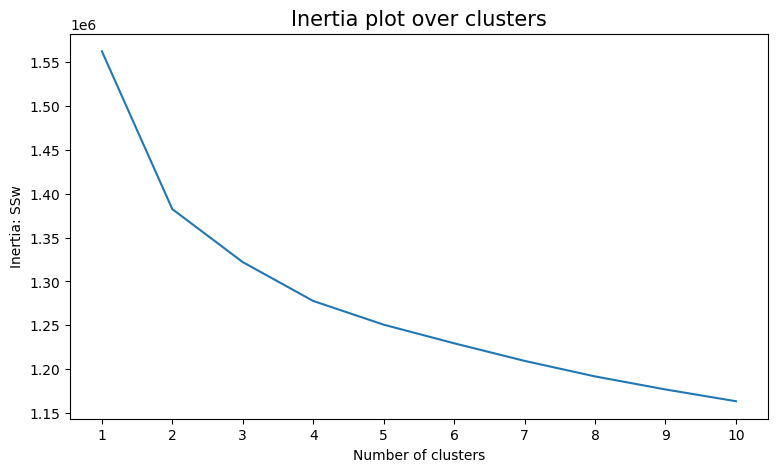

In [22]:
# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5271565510999692
For n_clusters = 3, the average silhouette_score is : 0.3456690473446285
For n_clusters = 4, the average silhouette_score is : 0.3224175248698235
For n_clusters = 5, the average silhouette_score is : 0.19998235242377682
For n_clusters = 6, the average silhouette_score is : 0.1907187680494721
For n_clusters = 7, the average silhouette_score is : 0.1705523271432088
For n_clusters = 8, the average silhouette_score is : -0.0044874989542483664
For n_clusters = 9, the average silhouette_score is : -0.002590308682998521
For n_clusters = 10, the average silhouette_score is : -0.0016396883937999606


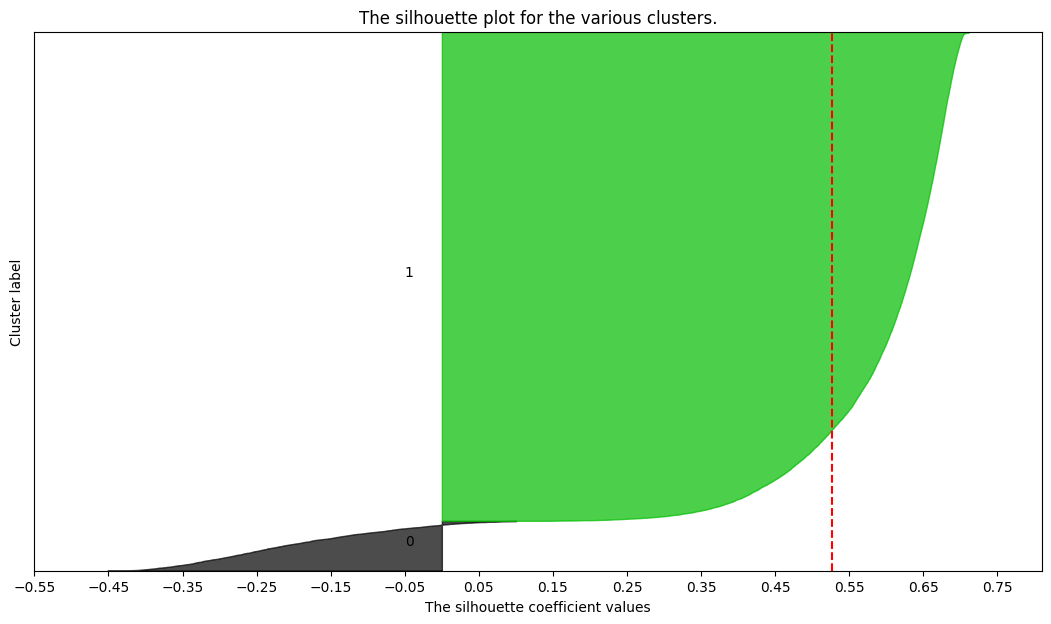

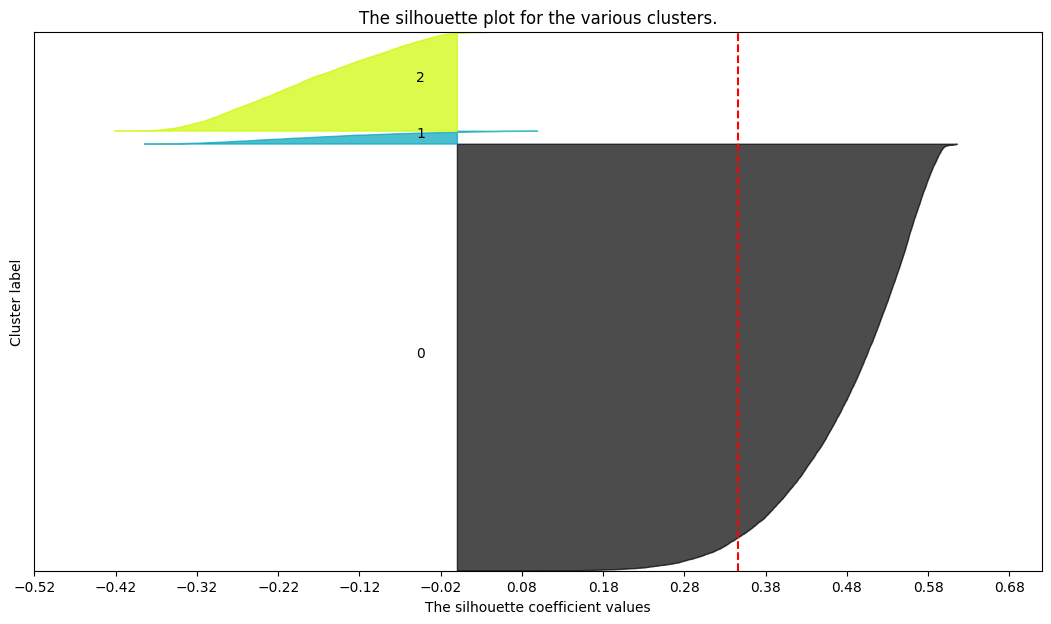

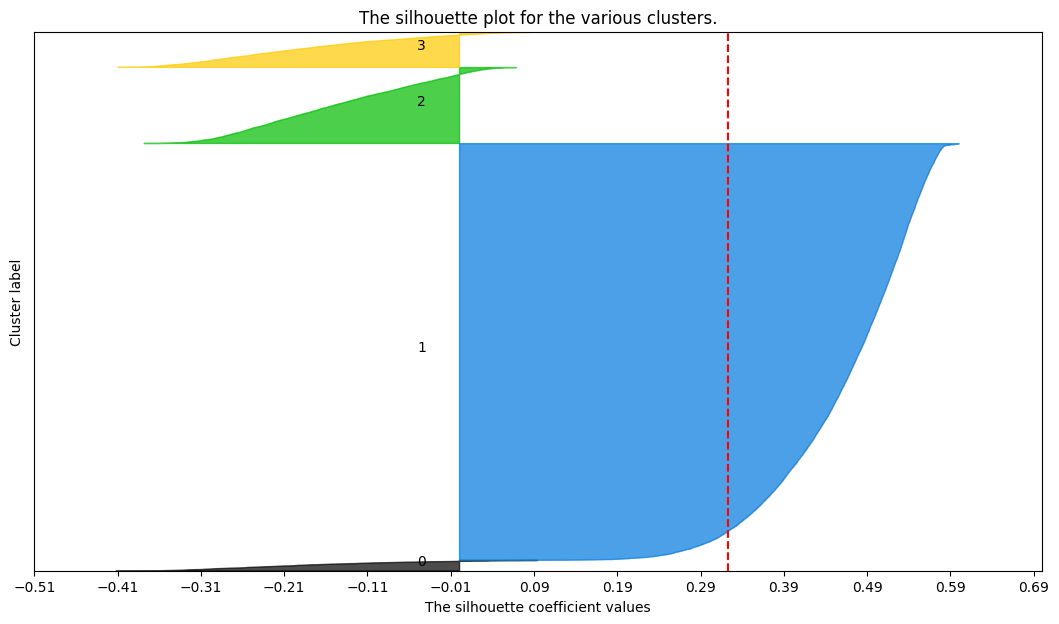

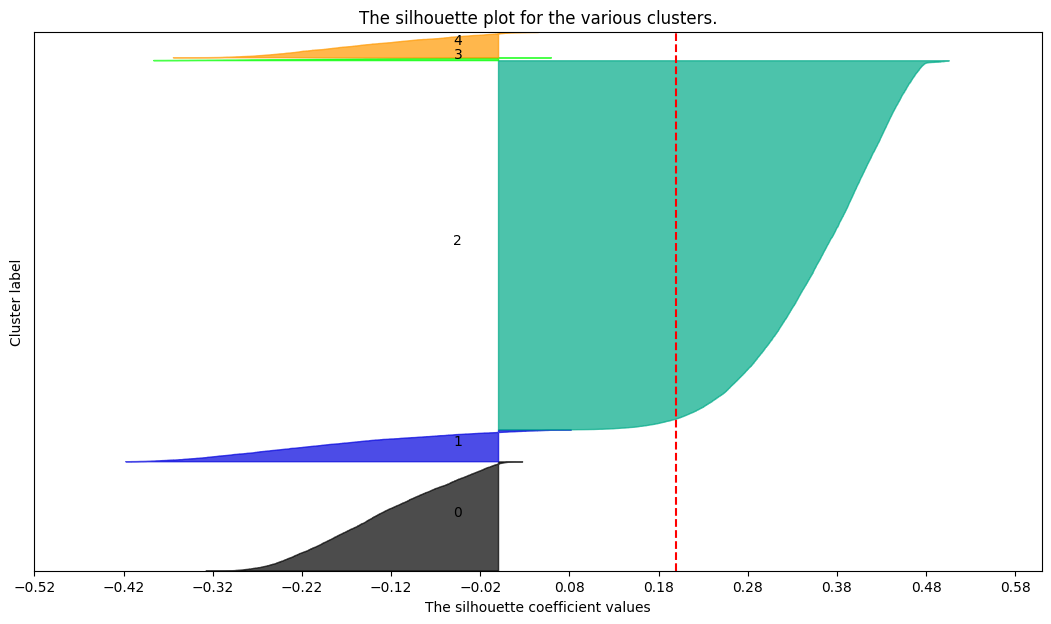

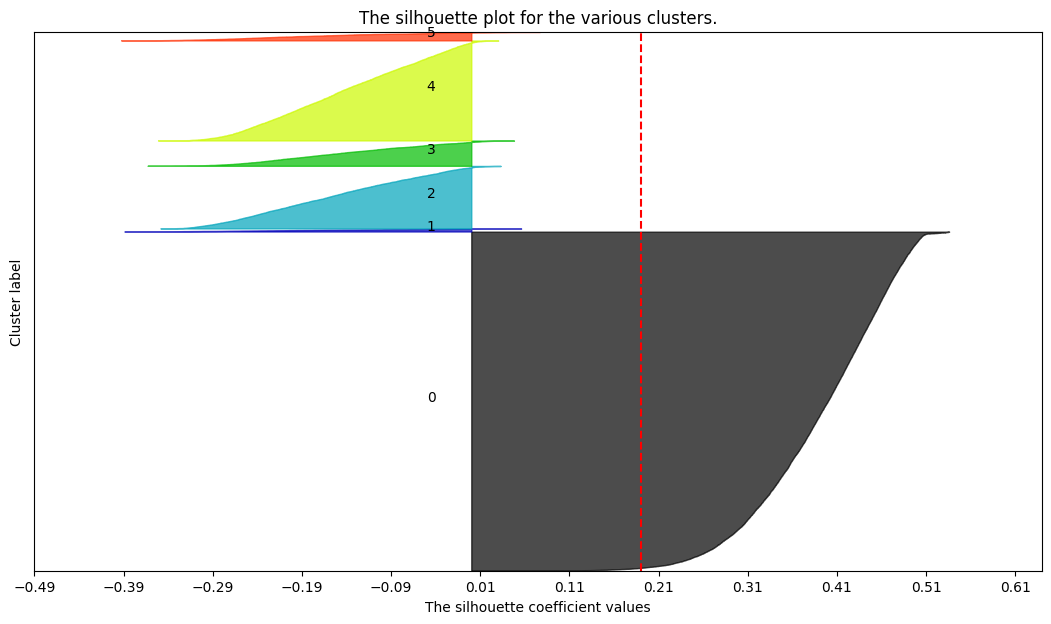

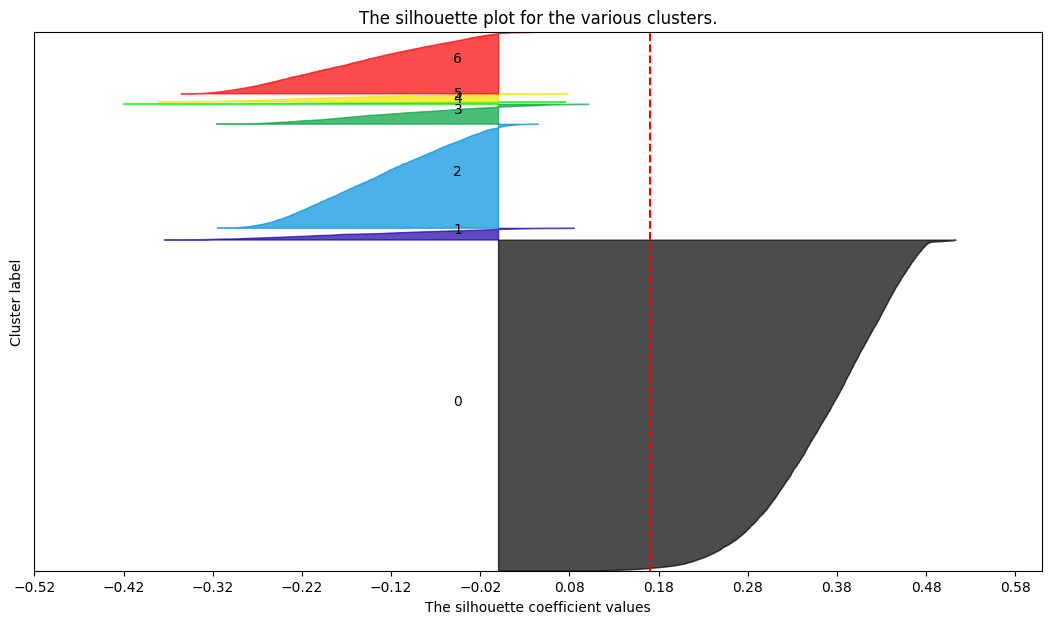

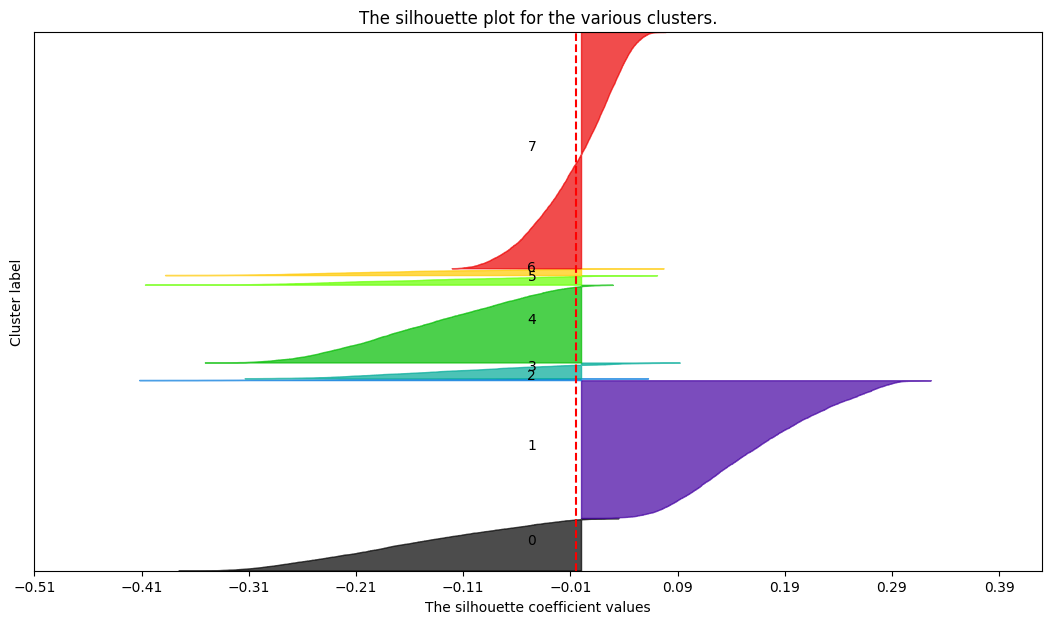

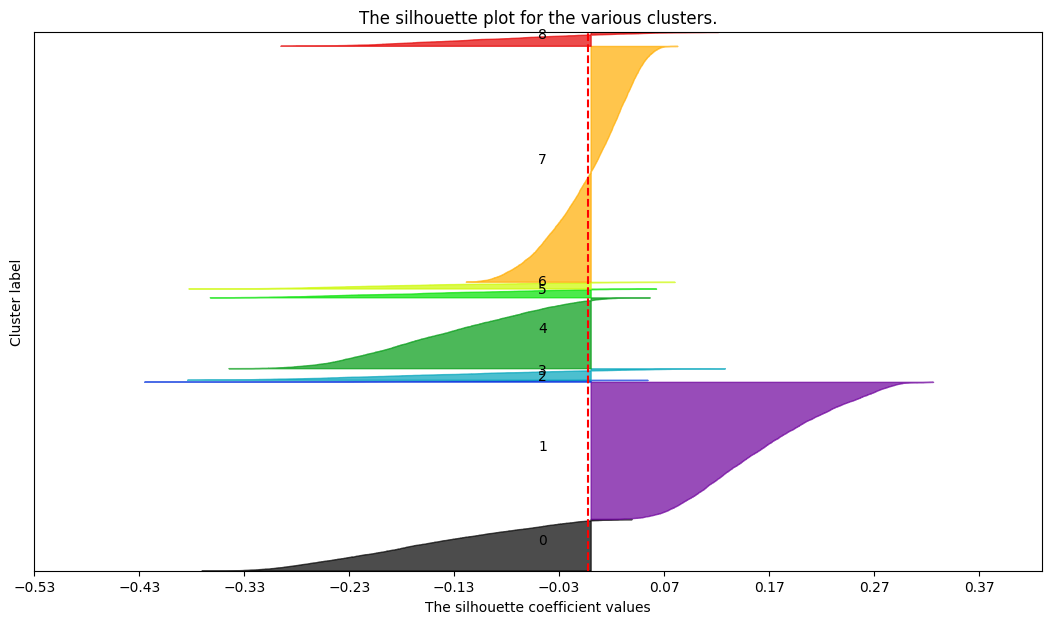

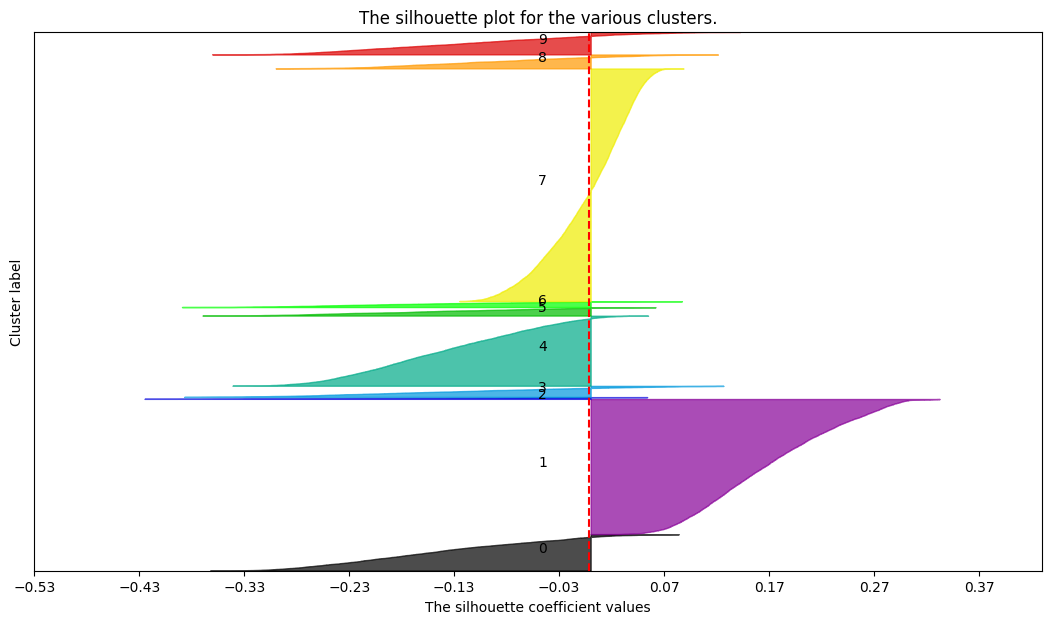

In [23]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_scaled_original)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_scaled_original, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled_original, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [24]:
# Convert km_labels to a pandas Series with the correct index
#km_labels_series = pd.Series(km_labels, name='labels', index=df_scaled_original.index)

# Concatenate the labels with the original dataframe
#df_concat = pd.concat([df_scaled_original, km_labels_series], axis=1)

# Group by labels and calculate the mean
#cluster_characteristics = df_concat.groupby('labels').mean()


In [25]:
#K-means with K=2 for original numeric data types
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count   product_count   is_chain   last_order   CUI_American   \
labels                                                                         
0            2.160894        2.326809   2.097974     0.818199       0.867939   
1           -0.219135       -0.235960  -0.212754    -0.082973      -0.088017   

        CUI_Asian   CUI_Beverages   CUI_Cafe   CUI_Chicken Dishes   \
labels                                                               
0         0.682911        0.456156   0.648623             0.673209   
1        -0.069253       -0.046258  -0.065776            -0.068270   

        CUI_Chinese   ...    HR_14     HR_15     HR_16     HR_17     HR_18   \
labels                ...                                                     
0           0.617530  ...  1.029145  1.010808  1.054595  1.161840  1.179871   
1          -0.062623  ... -0.104365 -0.102505 -0.106946 -0.117821 -0.119650   

          HR_19     HR_20     HR_21     HR_22      HR_23  
labels                                                    
0       1.064643  0.834312  0.605000  0.479965  0.426743  
1      -0.107965 -0.084607 -0.061353 -0.048673 -0.043276  

[2 rows x 49 columns]

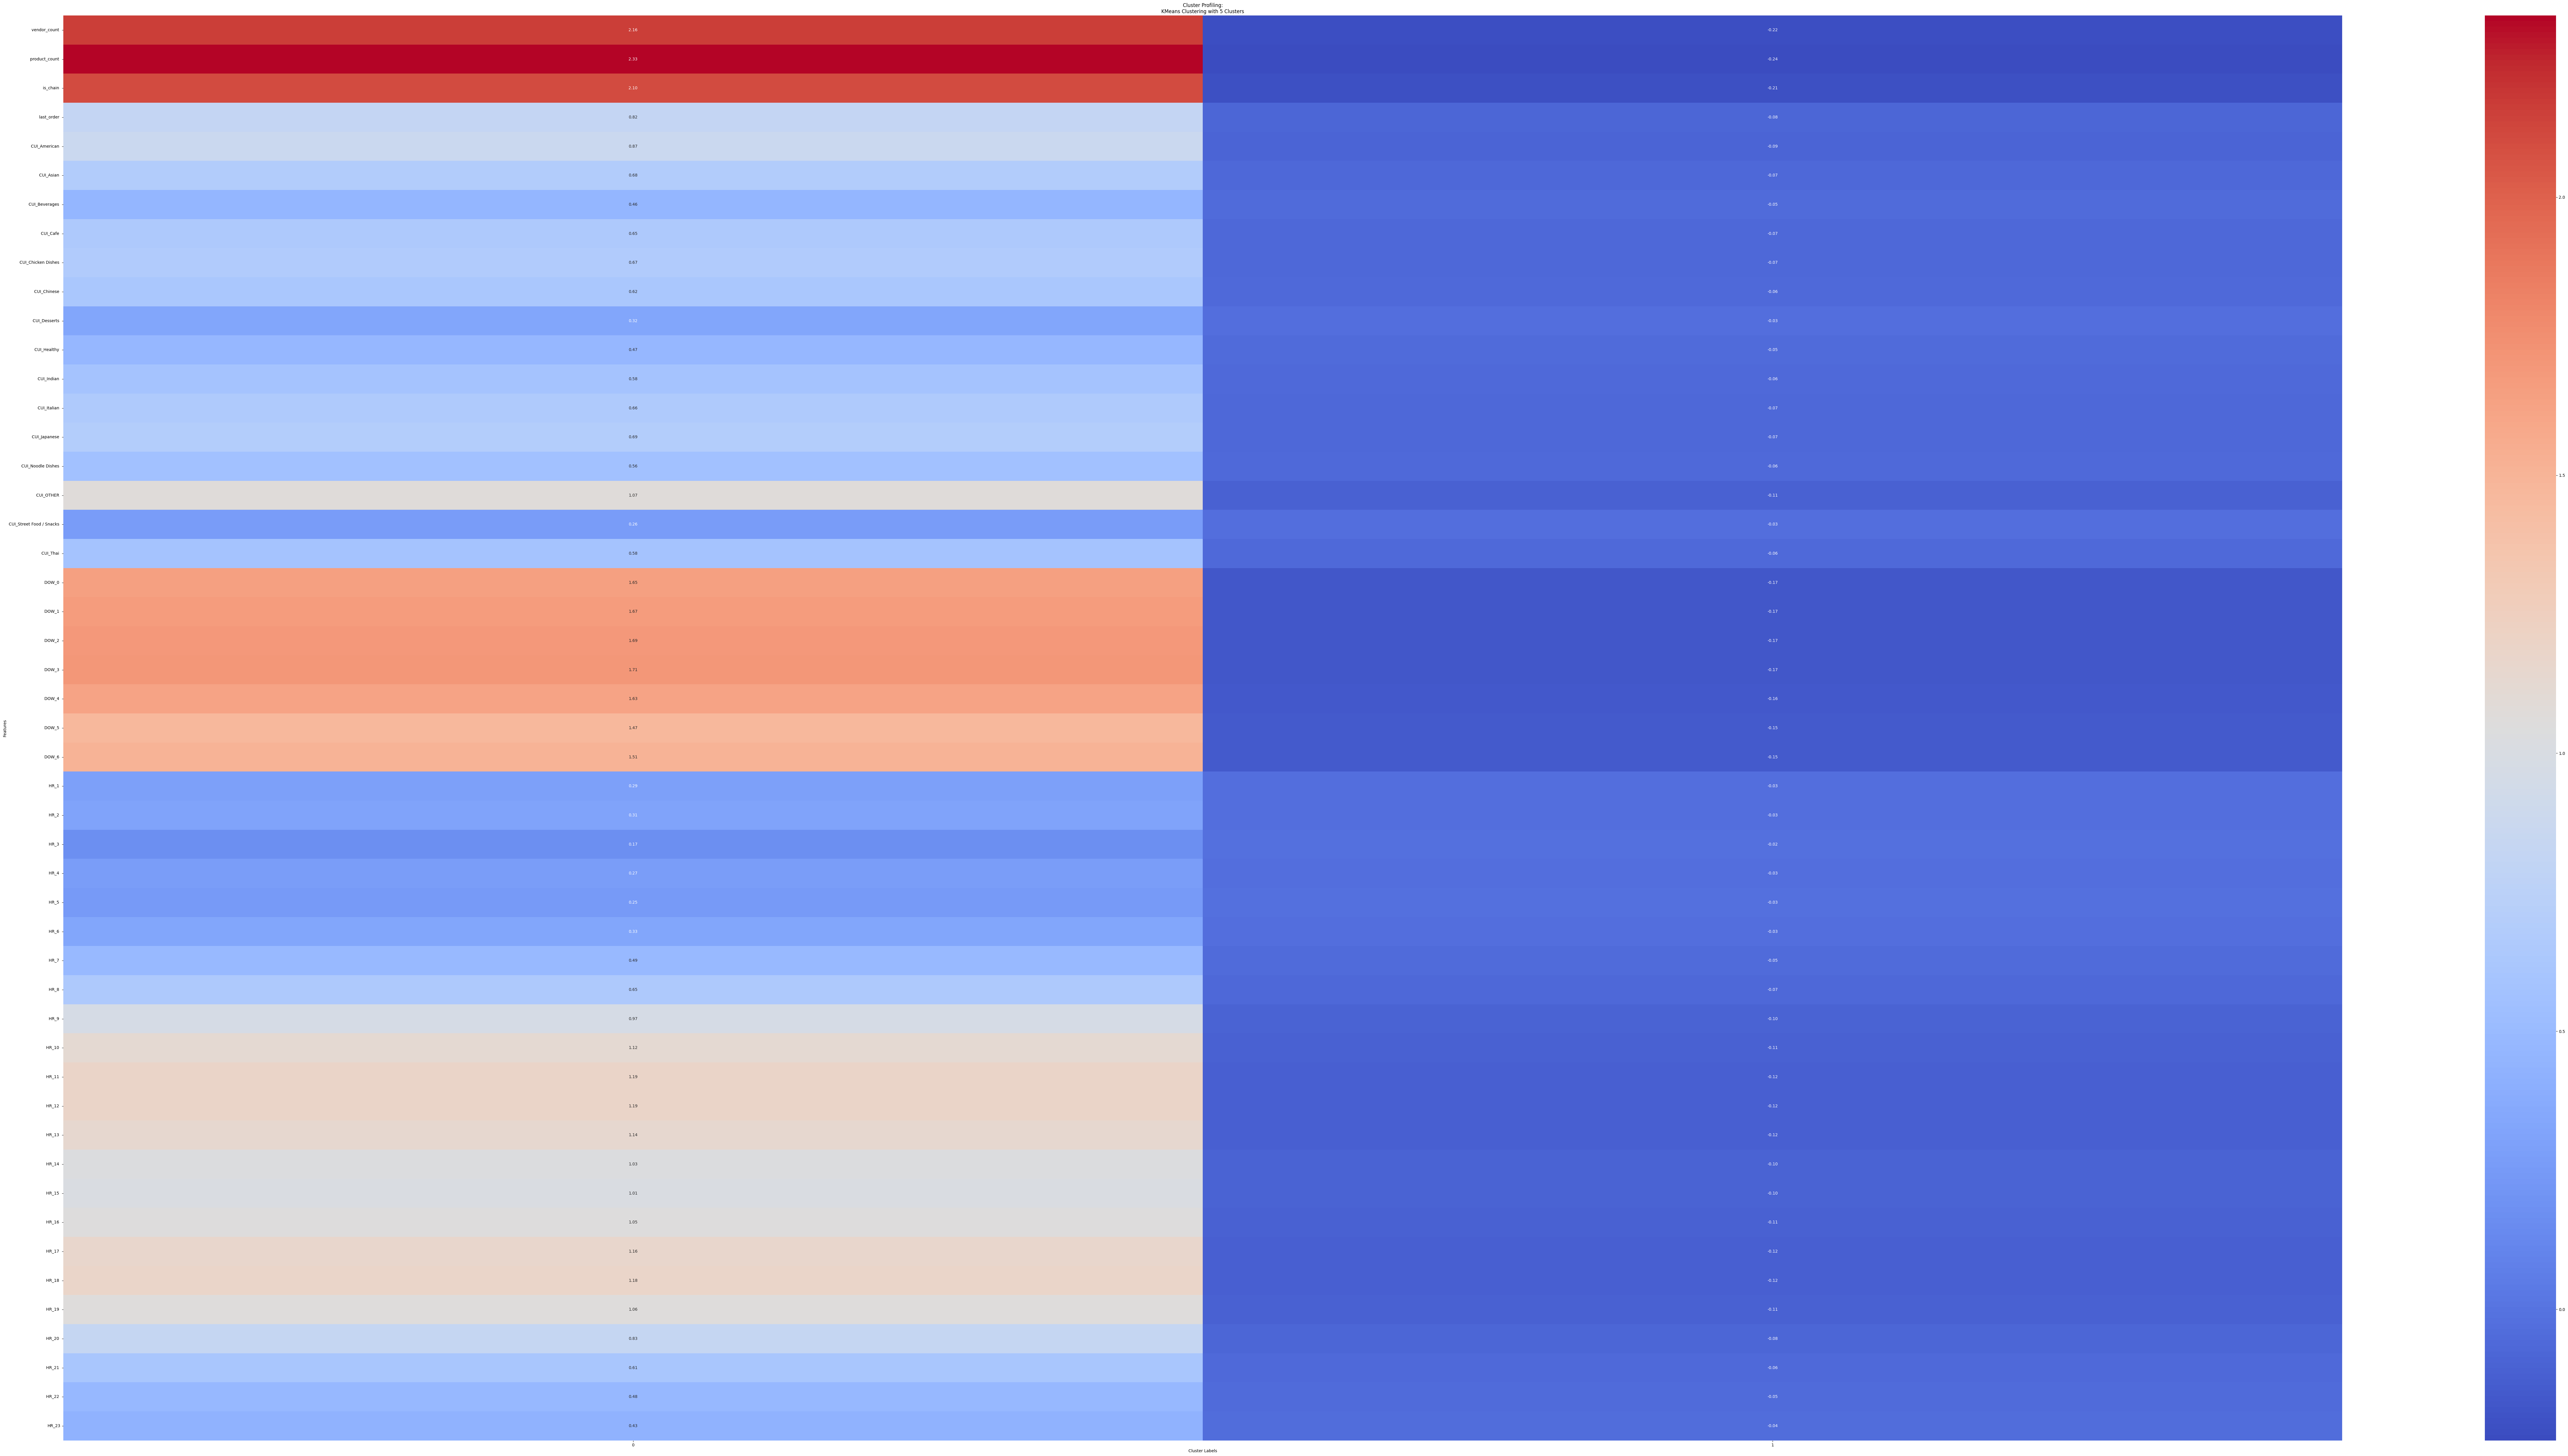

In [26]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()

In [27]:
#K-means with K=3 for original numeric data types
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count   product_count   is_chain   last_order   CUI_American   \
labels                                                                         
0           -0.362213       -0.355247  -0.311448    -0.186183      -0.152767   
1            3.450487        4.325601   4.018051     0.918992       1.259983   
2            1.119580        0.976158   0.826578     0.686123       0.497477   

        CUI_Asian   CUI_Beverages   CUI_Cafe   CUI_Chicken Dishes   \
labels                                                               
0        -0.142220       -0.086250  -0.079035            -0.096087   
1         0.685579        0.767038   1.721364             1.498730   
2         0.526235        0.273662   0.118908             0.221470   

        CUI_Chinese   ...    HR_14     HR_15     HR_16     HR_17     HR_18   \
labels                ...                                                     
0          -0.085240  ... -0.152458 -0.150320 -0.158129 -0.167182 -0.161122   
1           1.368793  ...  1.988724  1.890344  2.026110  2.292937  2.309590   
2           0.191385  ...  0.401793  0.405284  0.421474  0.426080  0.397715   

          HR_19     HR_20     HR_21     HR_22      HR_23  
labels                                                    
0      -0.142381 -0.113143 -0.088977 -0.071775 -0.076236  
1       2.053177  1.682205  1.285394  0.972019  0.725105  
2       0.349874  0.271471  0.218344  0.184531  0.235786  

[3 rows x 49 columns]

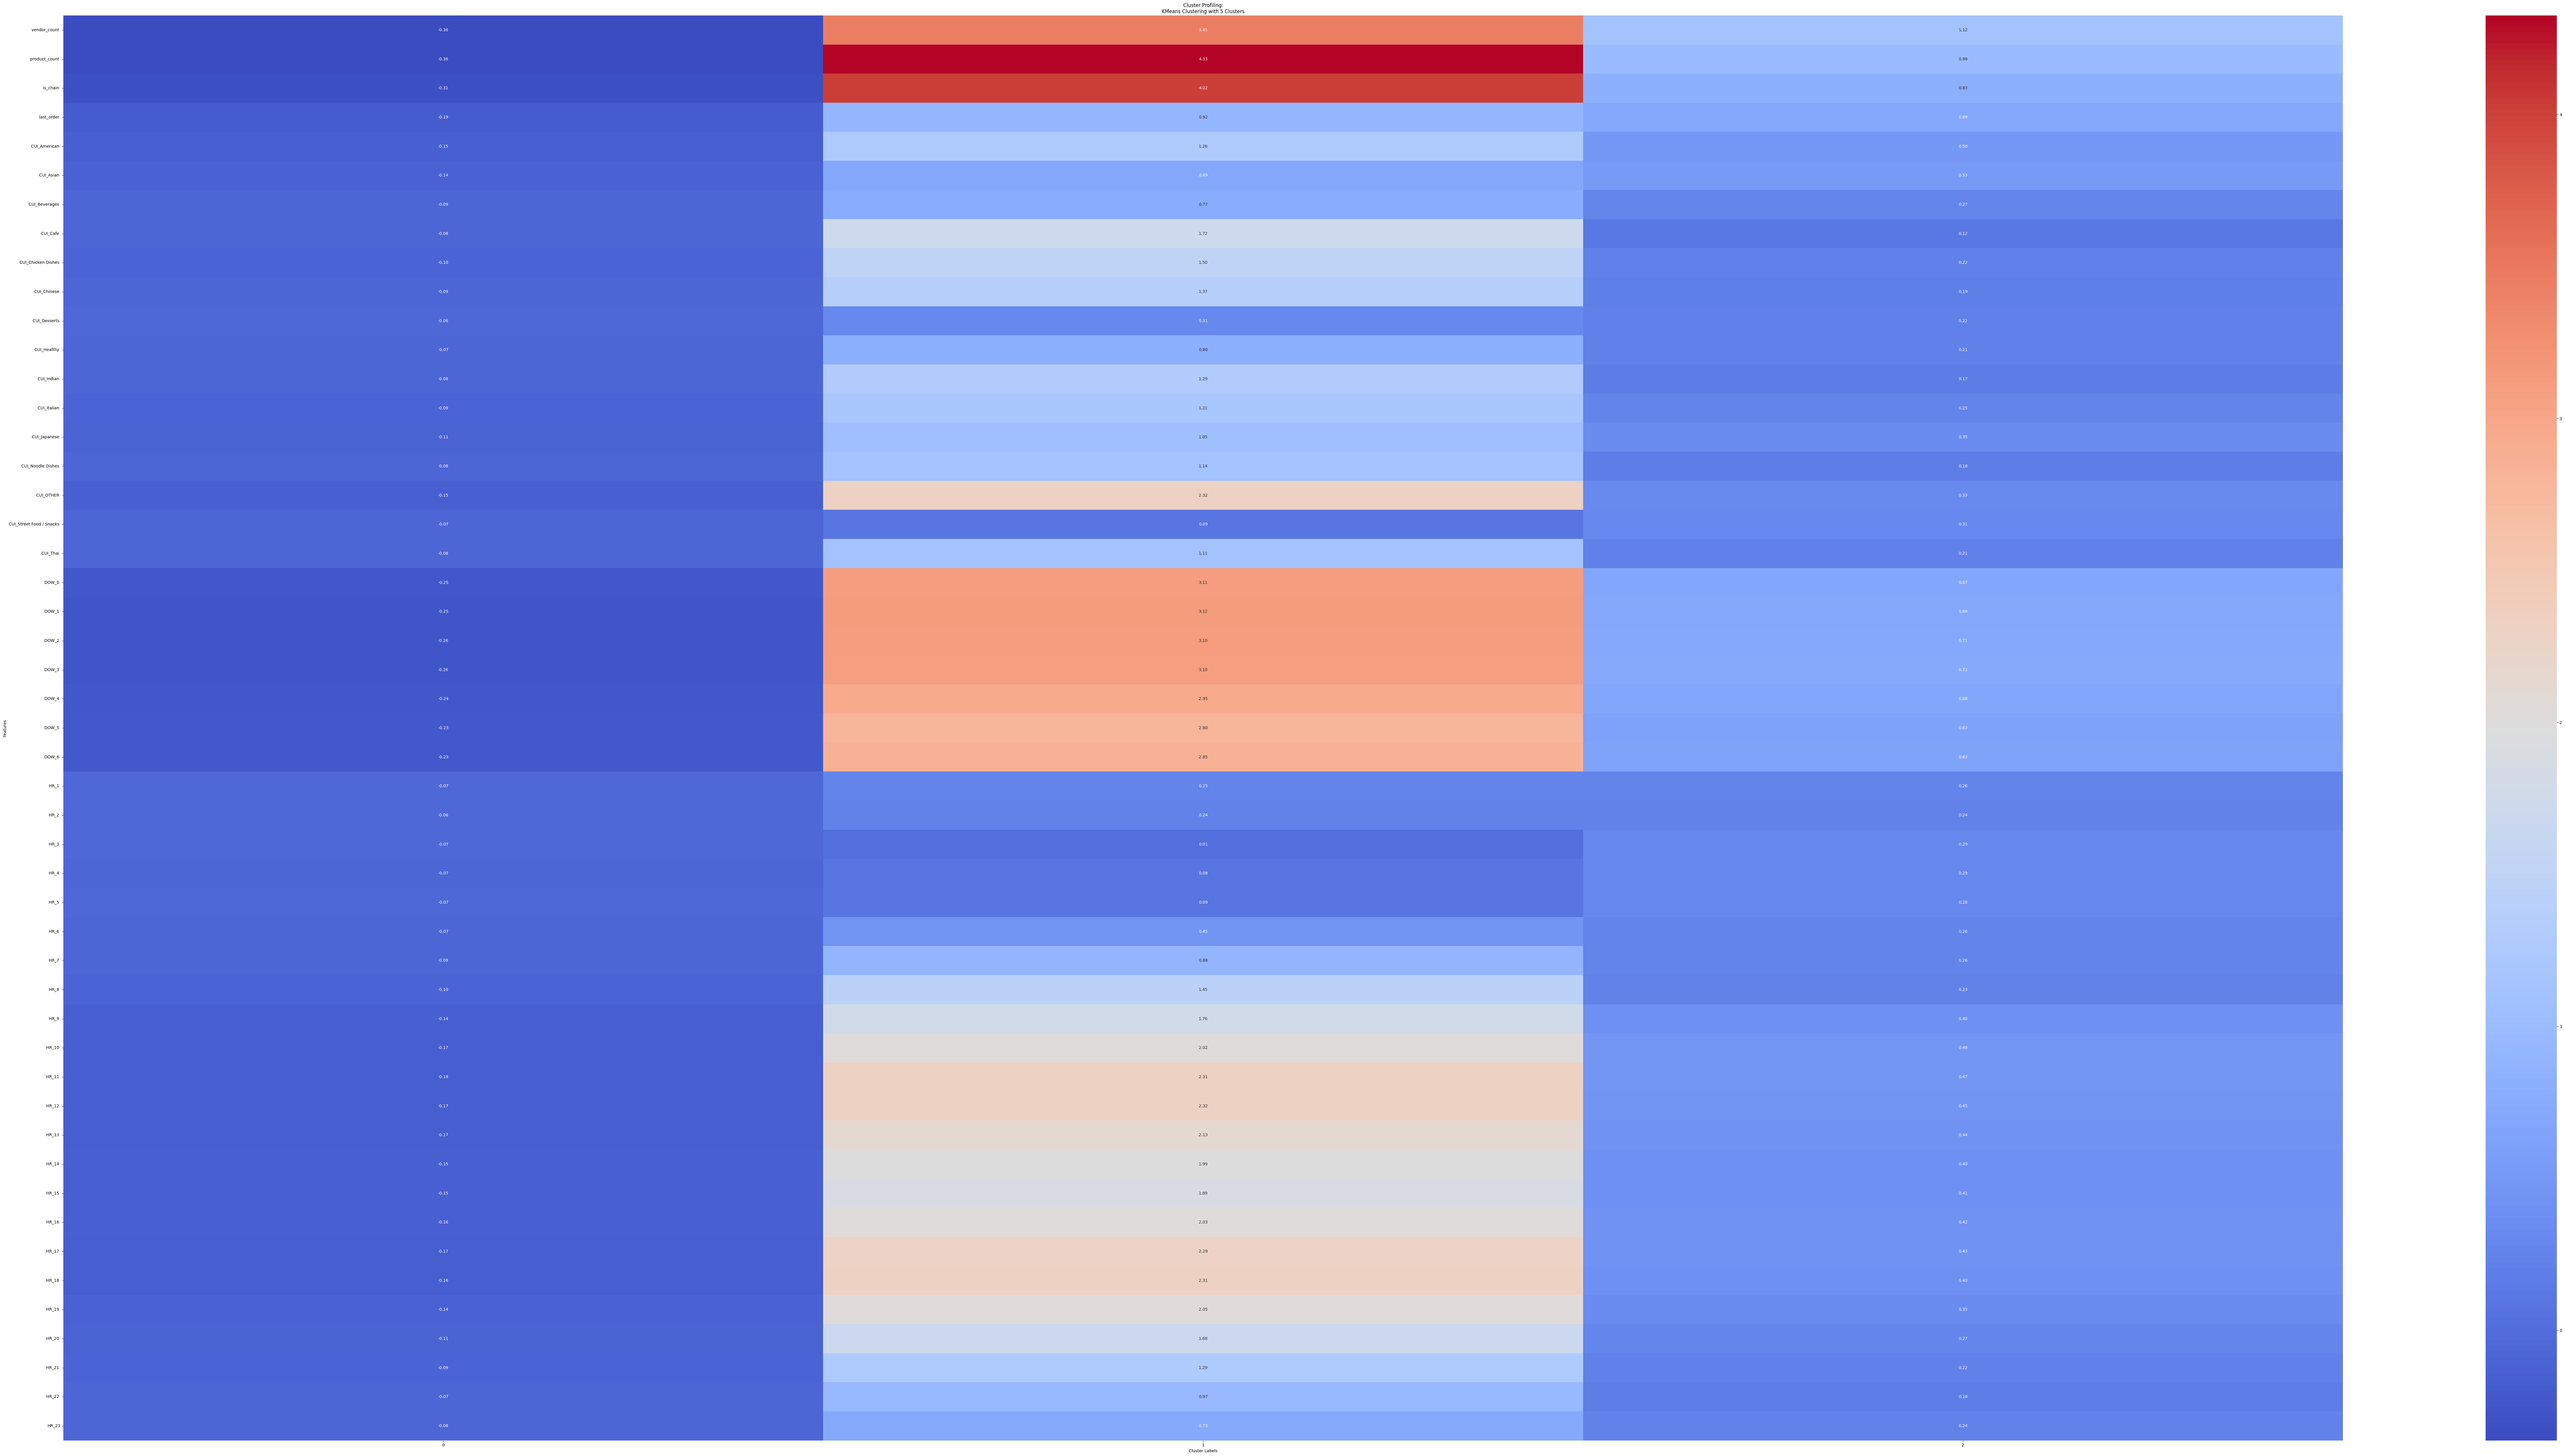

In [28]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


In [29]:
#K-means with K=4 for original numeric data types
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count   product_count   is_chain   last_order   CUI_American   \
labels                                                                         
0            3.568202        4.585225   4.298800     0.932605       1.319706   
1           -0.373572       -0.367216  -0.318335    -0.199475      -0.155323   
2            1.054712        0.963662   0.992963     0.668822       0.374604   
3            1.078983        0.892847   0.334172     0.641558       0.636875   

        CUI_Asian   CUI_Beverages   CUI_Cafe   CUI_Chicken Dishes   \
labels                                                               
0         0.482958        0.755857   2.026582             1.596219   
1        -0.156465       -0.097920  -0.078393            -0.098499   
2        -0.120026       -0.009818   0.197041             0.412643   
3         1.976564        0.958017  -0.107817            -0.205762   

        CUI_Chinese   ...    HR_14     HR_15     HR_16     HR_17     HR_18   \
labels                ...                                                     
0           1.481477  ...  2.088376  2.105503  2.238312  2.508195  2.449964   
1          -0.087658  ... -0.151167 -0.150595 -0.164242 -0.173836 -0.167511   
2           0.223650  ...  0.524479  0.599033  0.711062  0.761039  0.731263   
3           0.109820  ...  0.029609 -0.144073 -0.264806 -0.340711 -0.333791   

          HR_19     HR_20     HR_21     HR_22      HR_23  
labels                                                    
0       2.149931  1.800848  1.362931  0.868579  0.748862  
1      -0.148804 -0.117801 -0.092240 -0.071911 -0.073633  
2       0.647785  0.492248  0.391623  0.241444  0.133816  
3      -0.284582 -0.210608 -0.164039  0.069356  0.359528  

[4 rows x 49 columns]

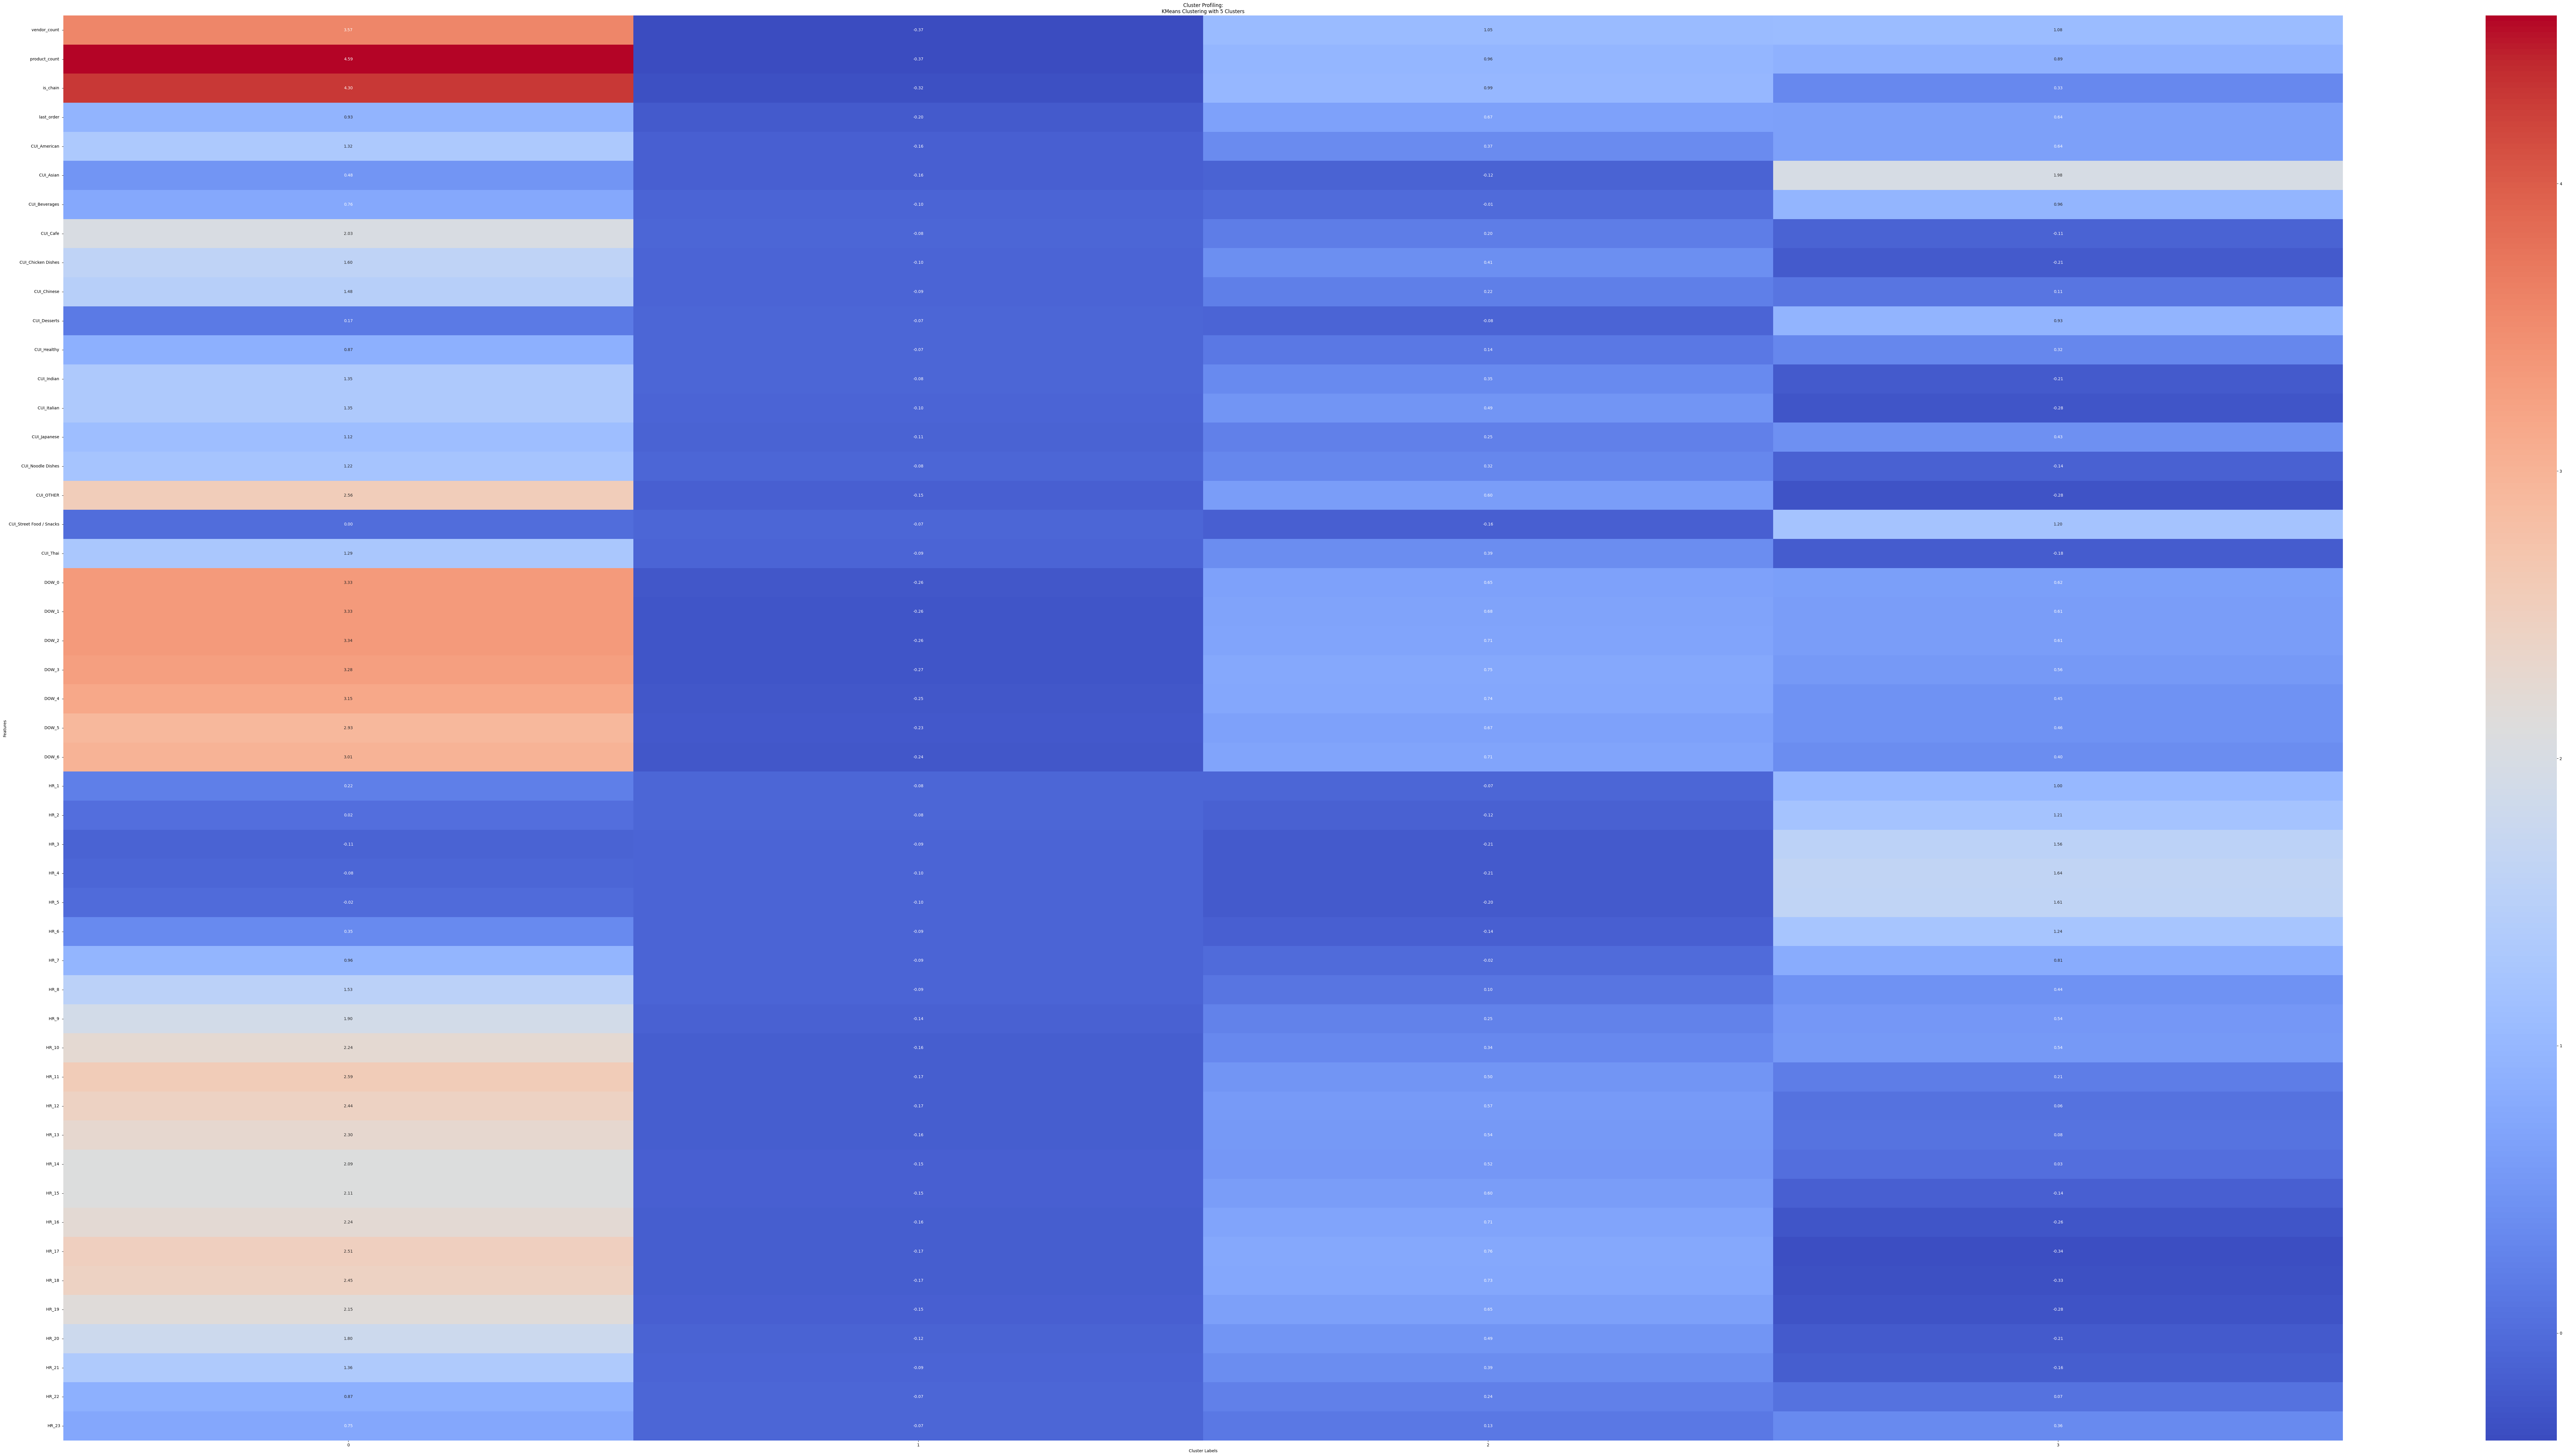

In [30]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


In [31]:
#K-means with K=5 for original numeric data types
kmclust = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count   product_count   is_chain   last_order   CUI_American   \
labels                                                                         
0            0.517100        0.400818   0.425753     0.575344       0.180384   
1            1.153400        0.963976   0.372475     0.660973       0.684572   
2           -0.444001       -0.423404  -0.372572    -0.291420      -0.183466   
3            5.005350        7.396992   7.107060     0.989809       1.549693   
4            2.258843        2.440835   2.364902     0.831999       0.871884   

        CUI_Asian   CUI_Beverages   CUI_Cafe   CUI_Chicken Dishes   \
labels                                                               
0        -0.138147       -0.068784   0.066939             0.199188   
1         2.095330        1.021763  -0.097280            -0.203162   
2        -0.151730       -0.092026  -0.087229            -0.120036   
3         0.870482        1.728092   3.081842             2.614259   
4         0.087562        0.171837   0.773943             0.864737   

        CUI_Chinese   ...    HR_14     HR_15     HR_16     HR_17     HR_18   \
labels                ...                                                     
0           0.072172  ...  0.263579  0.349482  0.436780  0.407597  0.343240   
1           0.124115  ...  0.036745 -0.149156 -0.268392 -0.338232 -0.335906   
2          -0.097453  ... -0.189253 -0.196070 -0.218726 -0.225645 -0.209609   
3           3.230010  ...  3.207055  3.150376  2.945034  3.574218  3.326413   
4           0.607045  ...  1.231617  1.199655  1.324918  1.571592  1.639012   

          HR_19     HR_20     HR_21     HR_22      HR_23  
labels                                                    
0       0.263814  0.213118  0.206866  0.117455  0.060597  
1      -0.282094 -0.208141 -0.159923  0.093076  0.378925  
2      -0.176044 -0.141149 -0.115750 -0.087015 -0.082106  
3       3.549318  3.071146  1.880905  1.087669  1.249378  
4       1.400948  1.069600  0.793655  0.528398  0.326426  

[5 rows x 49 columns]

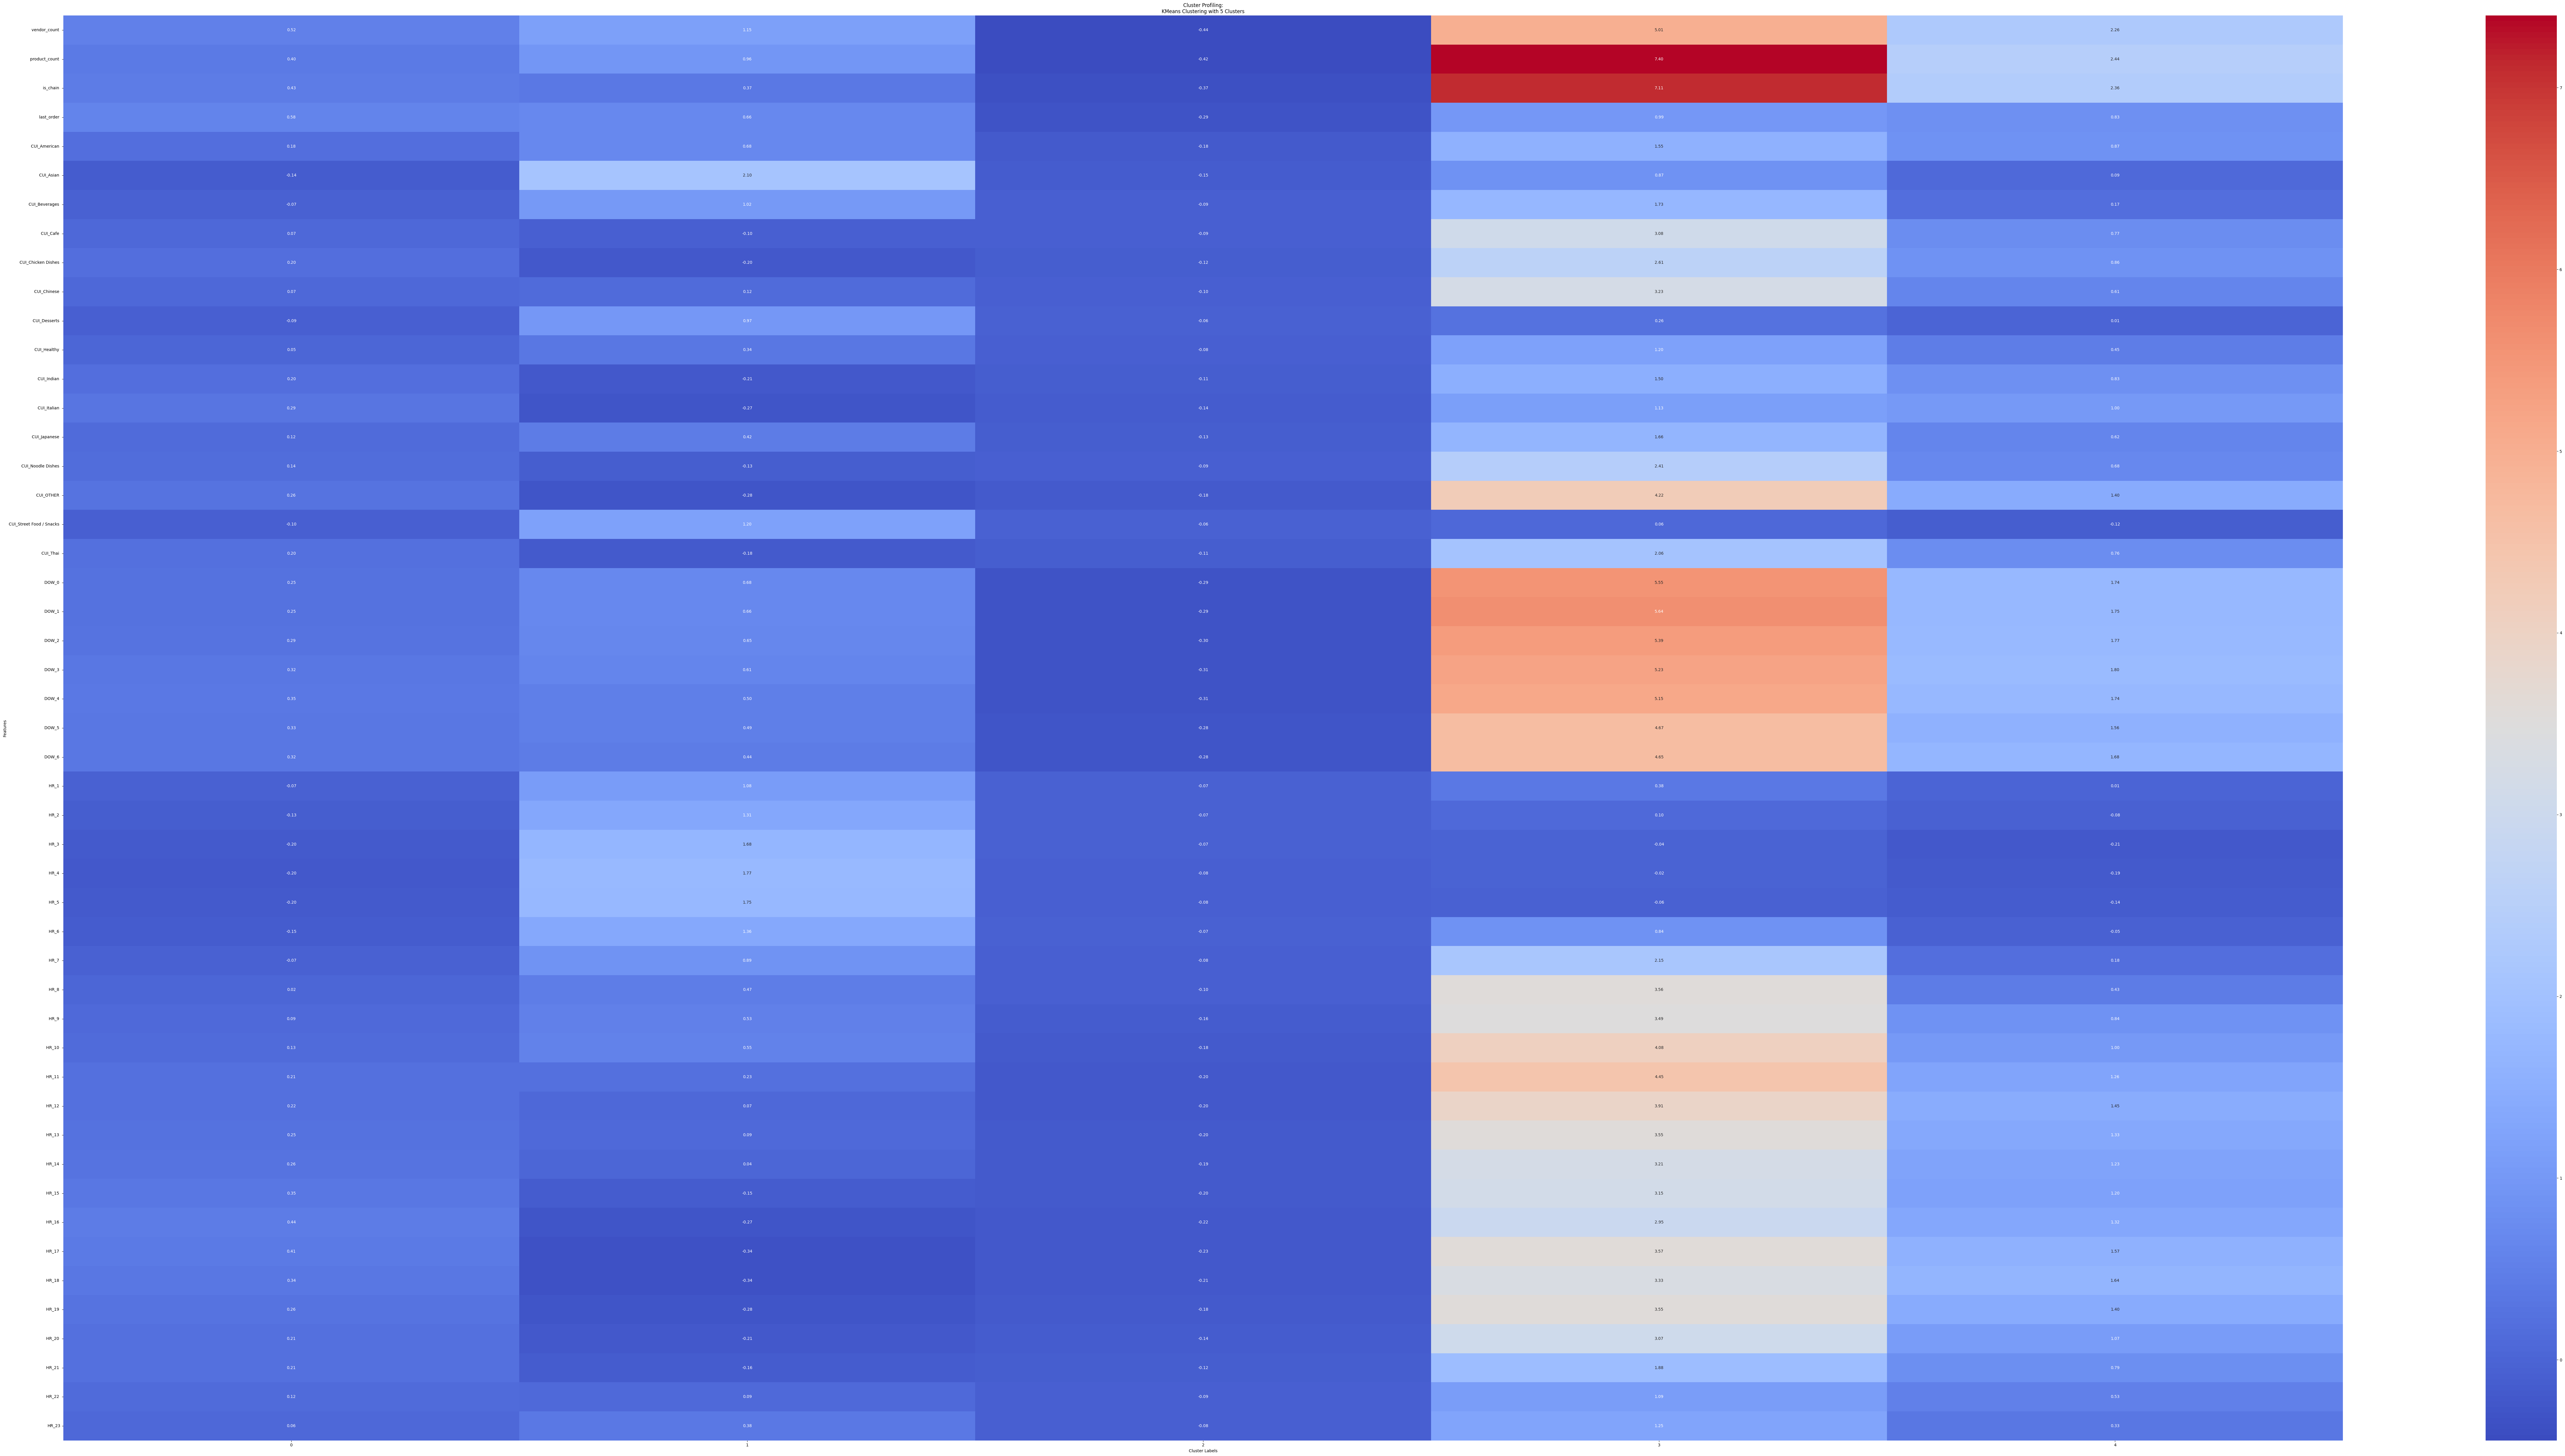

In [32]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


# Clustering df_original K-medoids

In [1]:
#Chat GPT created this K-medoids function since the scikit-learn one wasn't working
import numpy as np
from sklearn.metrics import pairwise_distances

def k_medoids(X, n_clusters, max_iter=300, metric='euclidean', random_state=None):
    """
    Perform K-Medoids clustering.

    Parameters:
    - X: ndarray
        The input data (rows are samples, columns are features).
    - n_clusters: int
        The number of clusters.
    - max_iter: int
        Maximum number of iterations.
    - metric: str
        Distance metric to use (e.g., 'euclidean', 'manhattan').
    - random_state: int
        Random seed for reproducibility.

    Returns:
    - medoids: ndarray
        Indices of medoid points.
    - labels: ndarray
        Cluster labels for each sample.
    """
    if random_state:
        np.random.seed(random_state)
    
    # Compute pairwise distance matrix
    distance_matrix = pairwise_distances(X, metric=metric)
    
    # Initialize medoids randomly
    medoids = np.random.choice(len(X), size=n_clusters, replace=False)
    labels = np.zeros(len(X), dtype=int)
    
    for _ in range(max_iter):
        # Assign each point to the nearest medoid
        for i in range(len(X)):
            distances_to_medoids = distance_matrix[i, medoids]
            labels[i] = np.argmin(distances_to_medoids)
        
        # Update medoids
        new_medoids = np.copy(medoids)
        for cluster in range(n_clusters):
            # Get points in the current cluster
            cluster_points = np.where(labels == cluster)[0]
            if len(cluster_points) == 0:
                continue  # Skip empty clusters
            
            # Compute total distance for each point in the cluster to all others
            cluster_distances = np.sum(distance_matrix[np.ix_(cluster_points, cluster_points)], axis=1)
            
            # Choose the point with the minimum total distance as the new medoid
            new_medoids[cluster] = cluster_points[np.argmin(cluster_distances)]
        
        # Check for convergence
        if np.array_equal(medoids, new_medoids):
            break
        
        medoids = new_medoids

    return medoids, labels


In [4]:
#K-medians with numeric features finding the best number of clusters

range_clusters = range(1, 11)

for n_clus in range_clusters:
    kmclust = k_medoids(n_clusters=4, random_state=42)
    kmclust.fit(df_scaled_original)
    inertia.append(kmclust.inertia_)  # Append the total cost (sum of distances to medoids)





NameError: name 'df_scaled_original' is not defined

In [ ]:
# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

In [33]:
# Perform K-Medoids clustering with K=4
medoids, labels = k_medoids(df_scaled_original.values, n_clusters=4, metric='euclidean', random_state=1)

# Add cluster labels to the DataFrame
df_concat = pd.concat(
    [df_scaled_original, pd.Series(labels, name='labels', index=df_scaled_original.index)],
    axis=1
)

# Characterize the final clusters
cluster_means = df_concat.groupby('labels').mean()
print(cluster_means)


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_scaled_original)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_scaled_original, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled_original, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
# Convert km_labels to a pandas Series with the correct index
#km_labels_series = pd.Series(km_labels, name='labels', index=df_scaled_original.index)

# Concatenate the labels with the original dataframe
#df_concat = pd.concat([df_scaled_original, km_labels_series], axis=1)

# Group by labels and calculate the mean
#cluster_characteristics = df_concat.groupby('labels').mean()


In [ ]:
#K-means with K=2 for original numeric data types
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()

In [ ]:
#K-means with K=3 for original numeric data types
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


In [ ]:
#K-means with K=4 for original numeric data types
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


In [ ]:
#K-means with K=5 for original numeric data types
kmclust = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_original)
km_labels = kmclust.fit_predict(df_scaled_original)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_original, pd.Series(km_labels, name='labels', index=df_scaled_original.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


# Clustering df_dropped K-means

In [28]:
#Select numeric data types
df_numeric_dropped = df_dropped.select_dtypes(include=[np.number])


In [29]:
#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()
df_scaled_dropped = scaler.fit_transform(df_numeric_dropped)

# Convert the scaled array back to a DataFrame
df_scaled_dropped = pd.DataFrame(df_scaled_dropped, columns=df_numeric_dropped.columns, index=df_numeric_dropped.index)


In [30]:
df_scaled_dropped.head()

customer_age  vendor_count  product_count  is_chain  first_order  \
0     -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1     -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2      1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3     -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4     -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   

   last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0   -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1   -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2   -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3   -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4   -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   

   weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
0        0.413359            -0.827803       2.273273     -0.517547   
1        0.413359            -0.827803       2.273273      0.037177   
2        0.413359            -0.827803       2.273273      0.037177   
3       -0.149654            -0.562671       0.672111      0.037177   
4       -0.149654            -0.562671       0.672111     -0.517547   

   dinner_orders  morning_orders  midday_orders  evening_orders  night_orders  \
0       0.757104       -0.463208      -0.615700        0.204674     -0.276604   
1      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
2      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
3      -0.434062       -0.463208       0.246671       -0.582069     -0.276604   
4      -0.434062        0.632602      -0.615700       -0.582069     -0.276604   

   drinking_orders  
0        -0.362107  
1        -0.362107  
2        -0.362107  
3        -0.362107  
4        -0.362107  

[5 rows x 34 columns]

In [31]:
#K-means with numeric features finding the best number of clusters

range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_scaled_dropped)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

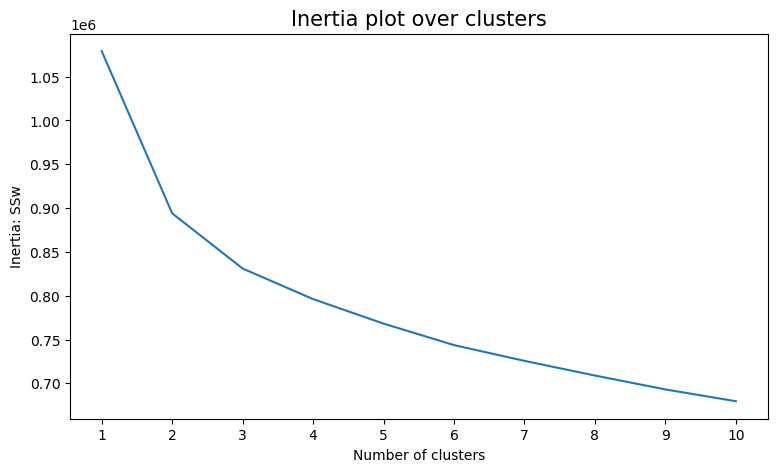

In [32]:
# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5140142572502708
For n_clusters = 3, the average silhouette_score is : 0.30791930088403946
For n_clusters = 4, the average silhouette_score is : 0.30950909301371193
For n_clusters = 5, the average silhouette_score is : 0.1222181942334521
For n_clusters = 6, the average silhouette_score is : 0.06542099093089387
For n_clusters = 7, the average silhouette_score is : 0.06717755902770381
For n_clusters = 8, the average silhouette_score is : 0.05846000298262023
For n_clusters = 9, the average silhouette_score is : 0.05913912699852274
For n_clusters = 10, the average silhouette_score is : 0.0623025452417672


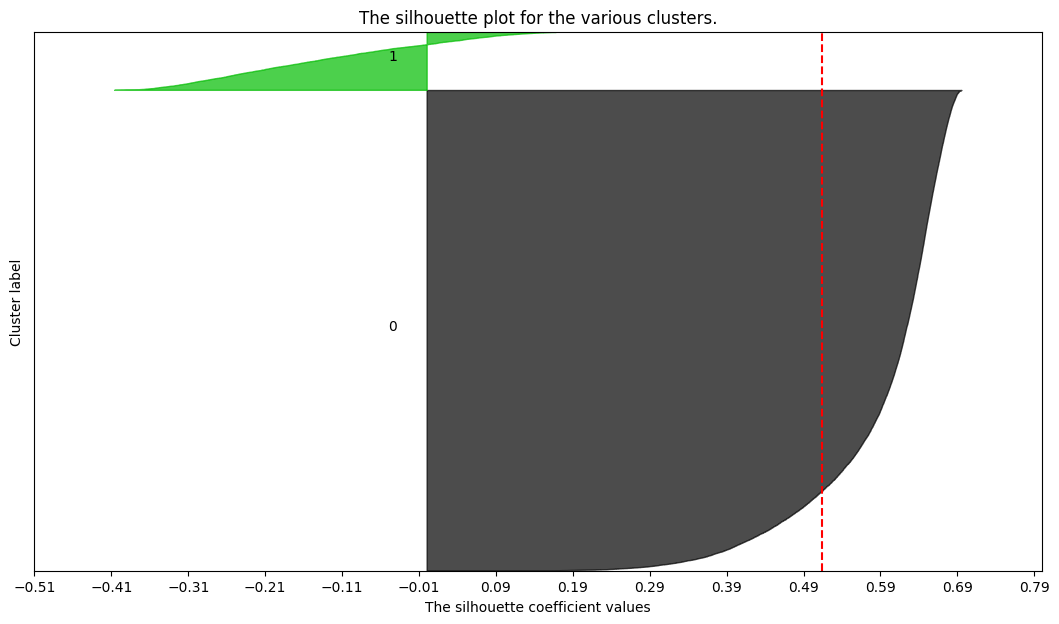

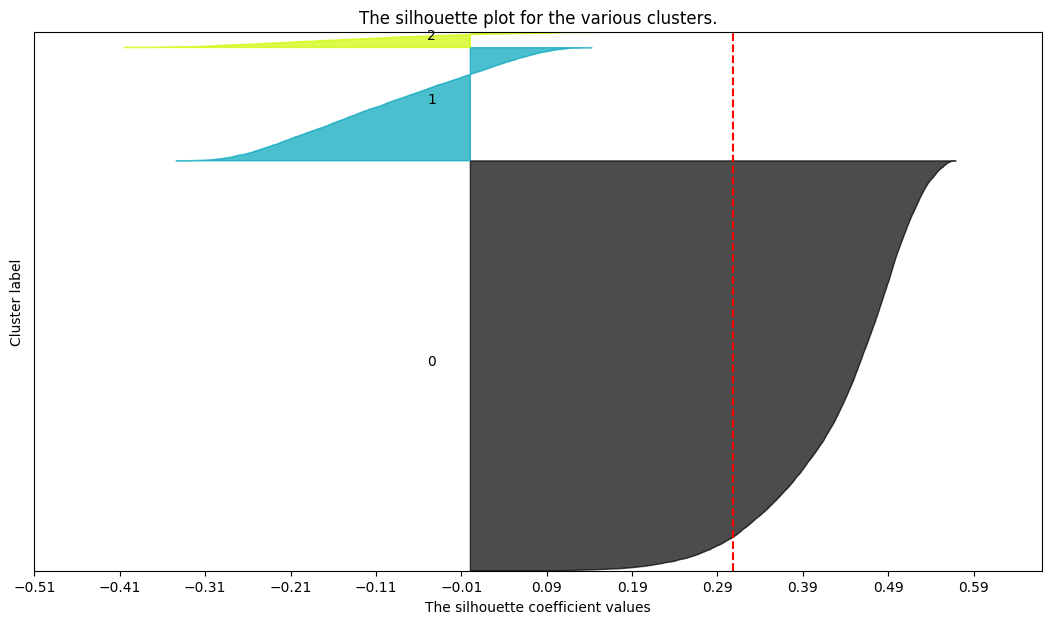

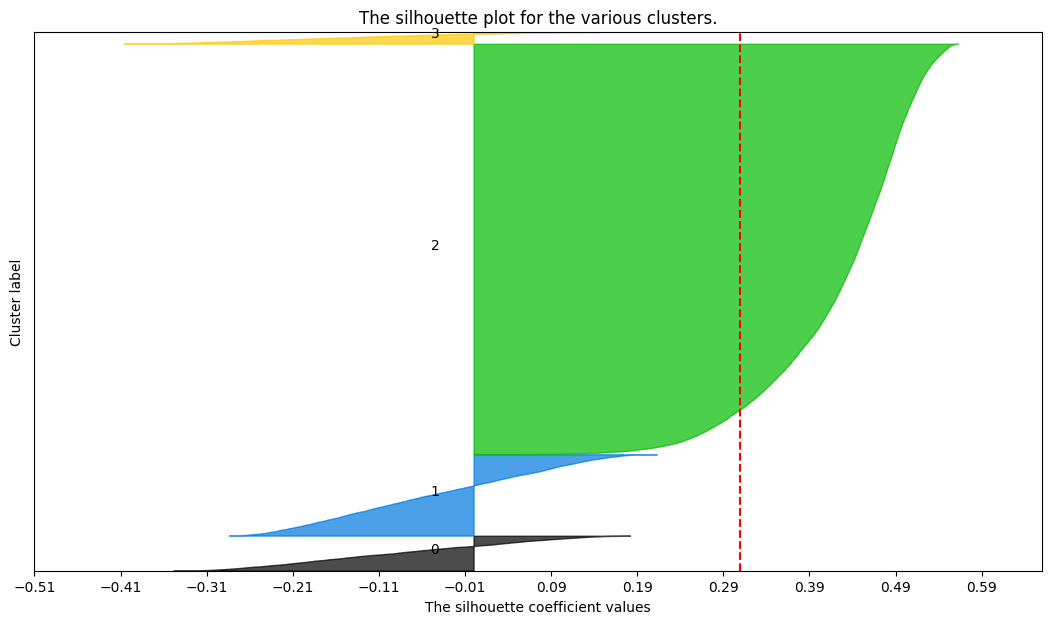

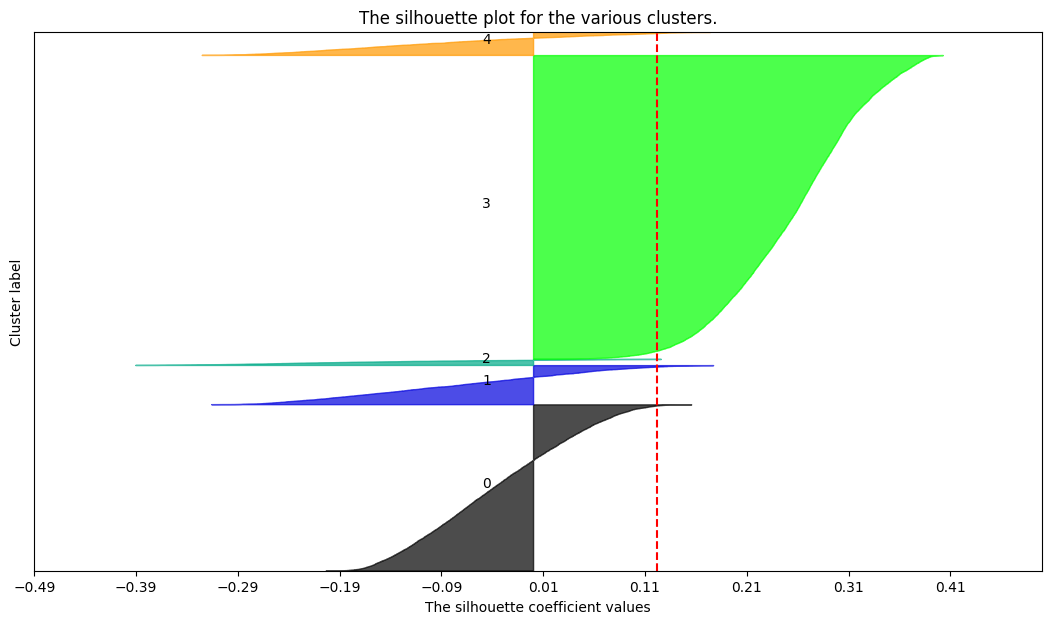

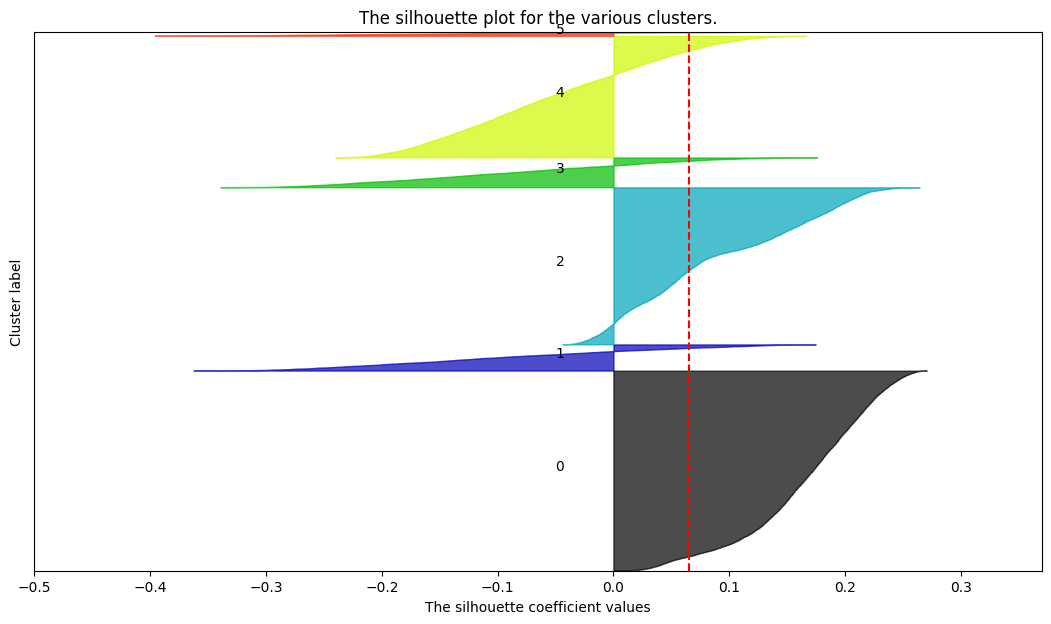

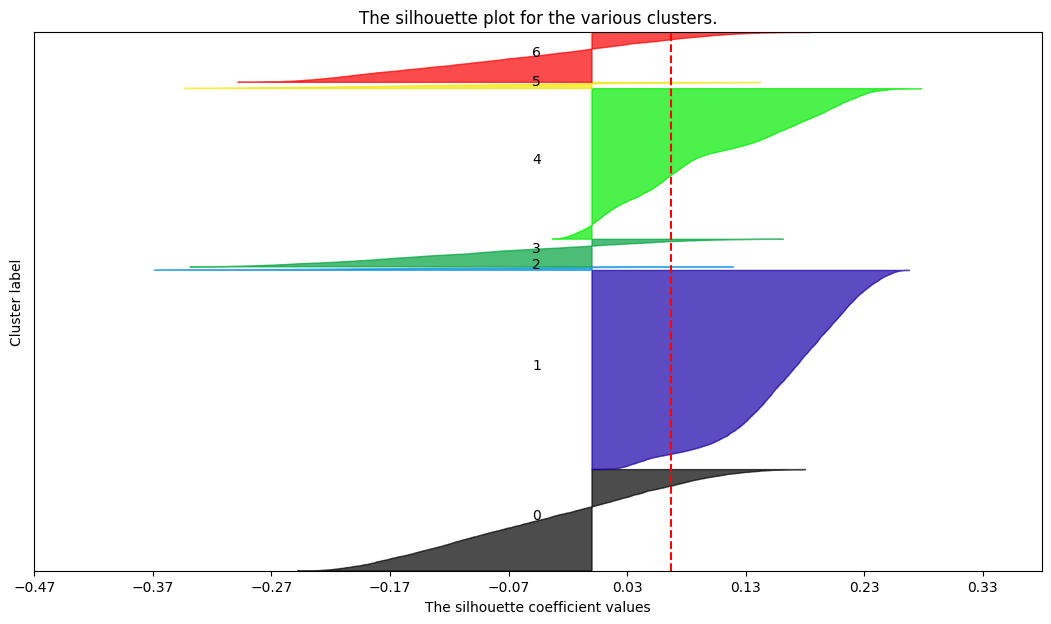

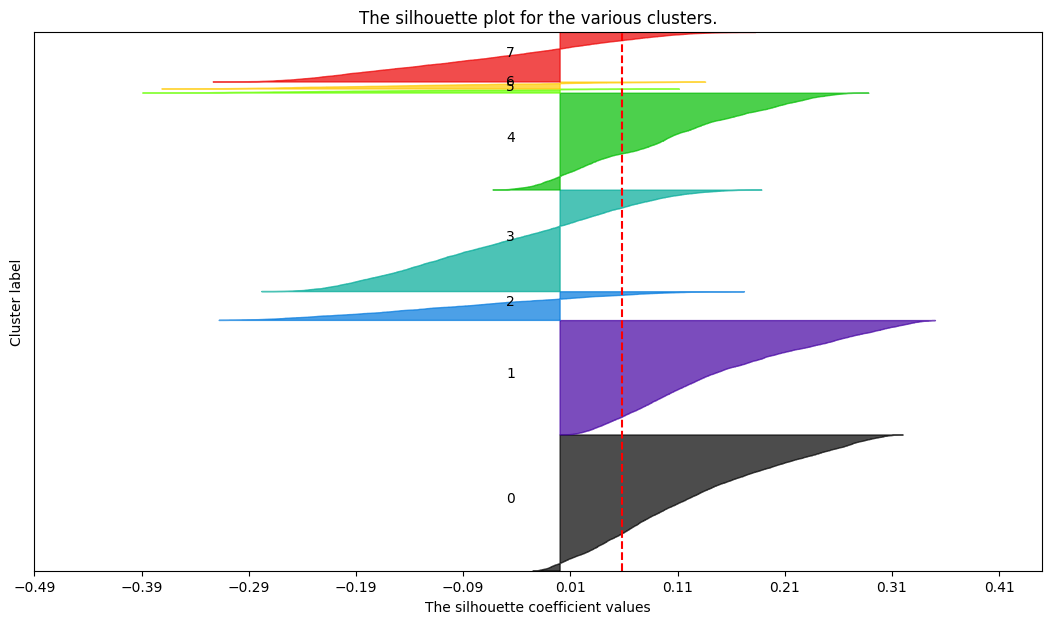

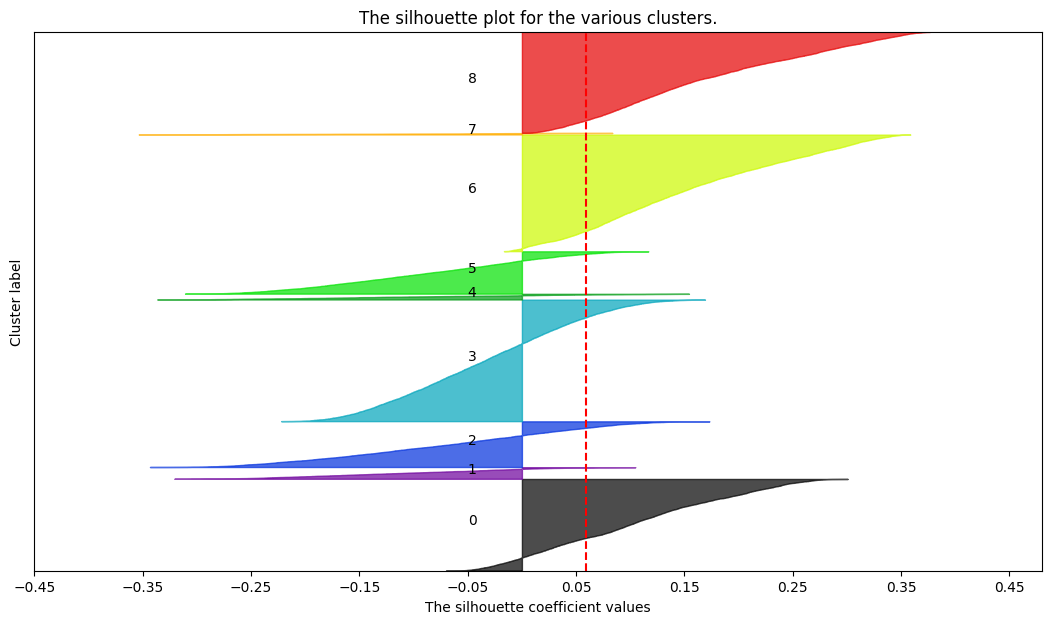

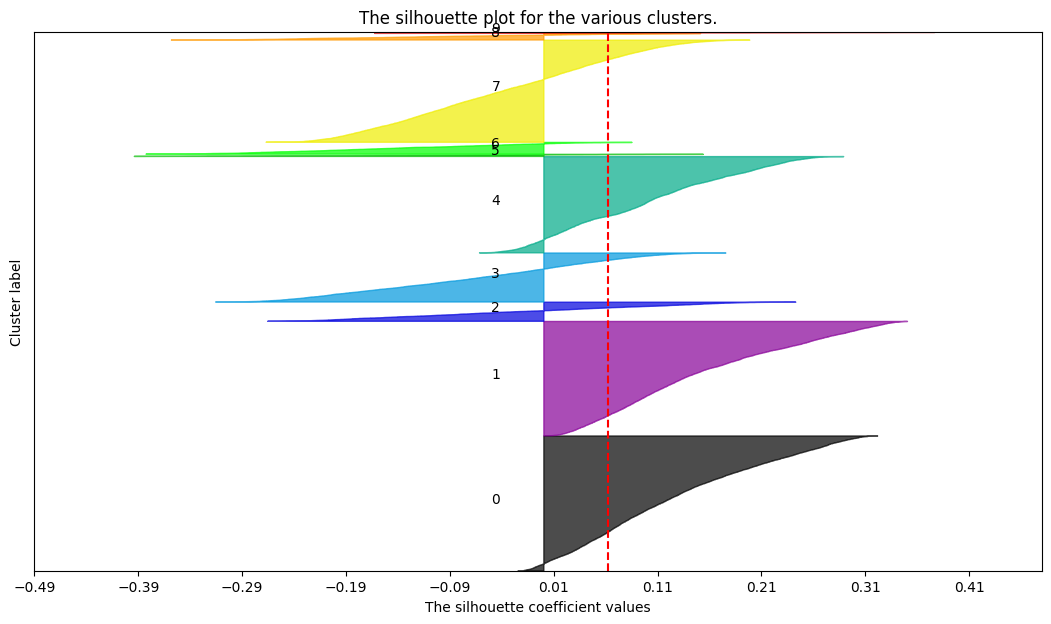

In [33]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_scaled_dropped)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_scaled_dropped, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled_dropped, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_dropped) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [34]:
# Convert km_labels to a pandas Series with the correct index
#km_labels_series = pd.Series(km_labels, name='labels', index=df_scaled_dropped.index)

# Concatenate the labels with the original dataframe
#df_concat = pd.concat([df_scaled_dropped, km_labels_series], axis=1)

# Group by labels and calculate the mean
#cluster_characteristics = df_concat.groupby('labels').mean()


In [35]:
#K-means with K=3 for 'dropped' numeric data types
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_dropped)
km_labels = kmclust.fit_predict(df_scaled_dropped)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_dropped, pd.Series(km_labels, name='labels', index=df_scaled_dropped.index)), axis=1)
df_concat.groupby('labels').mean()

customer_age  vendor_count  product_count  is_chain  first_order  \
labels                                                                     
0          -0.003862     -0.396177      -0.378176 -0.331082     0.214755   
1           0.012769      0.986345       0.825392  0.706881    -0.648714   
2           0.009273      3.381775       4.100186  3.707681    -0.976769   

        last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
labels                                                                ...   
0        -0.209054     -0.159611  -0.152066      -0.092439 -0.081190  ...   
1         0.637072      0.416243   0.425279       0.231827  0.096835  ...   
2         0.908928      1.220778   0.947470       0.776397  1.483739  ...   

        weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
labels                                                                     
0            -0.320368            -0.366527      -0.004518     -0.255933   
1             0.697484             0.802874       0.014426      0.531670   
2             3.486476             3.952049       0.014695      2.976964   

        dinner_orders  morning_orders  midday_orders  evening_orders  \
labels                                                                 
0           -0.210568       -0.213919      -0.289115       -0.258974   
1            0.414027        0.469742       0.612287        0.529141   
2            2.625007        2.297912       3.275169        3.078768   

        night_orders  drinking_orders  
labels                                 
0          -0.126051        -0.115776  
1           0.286210         0.363916  
2           1.283314         0.420032  

[3 rows x 34 columns]

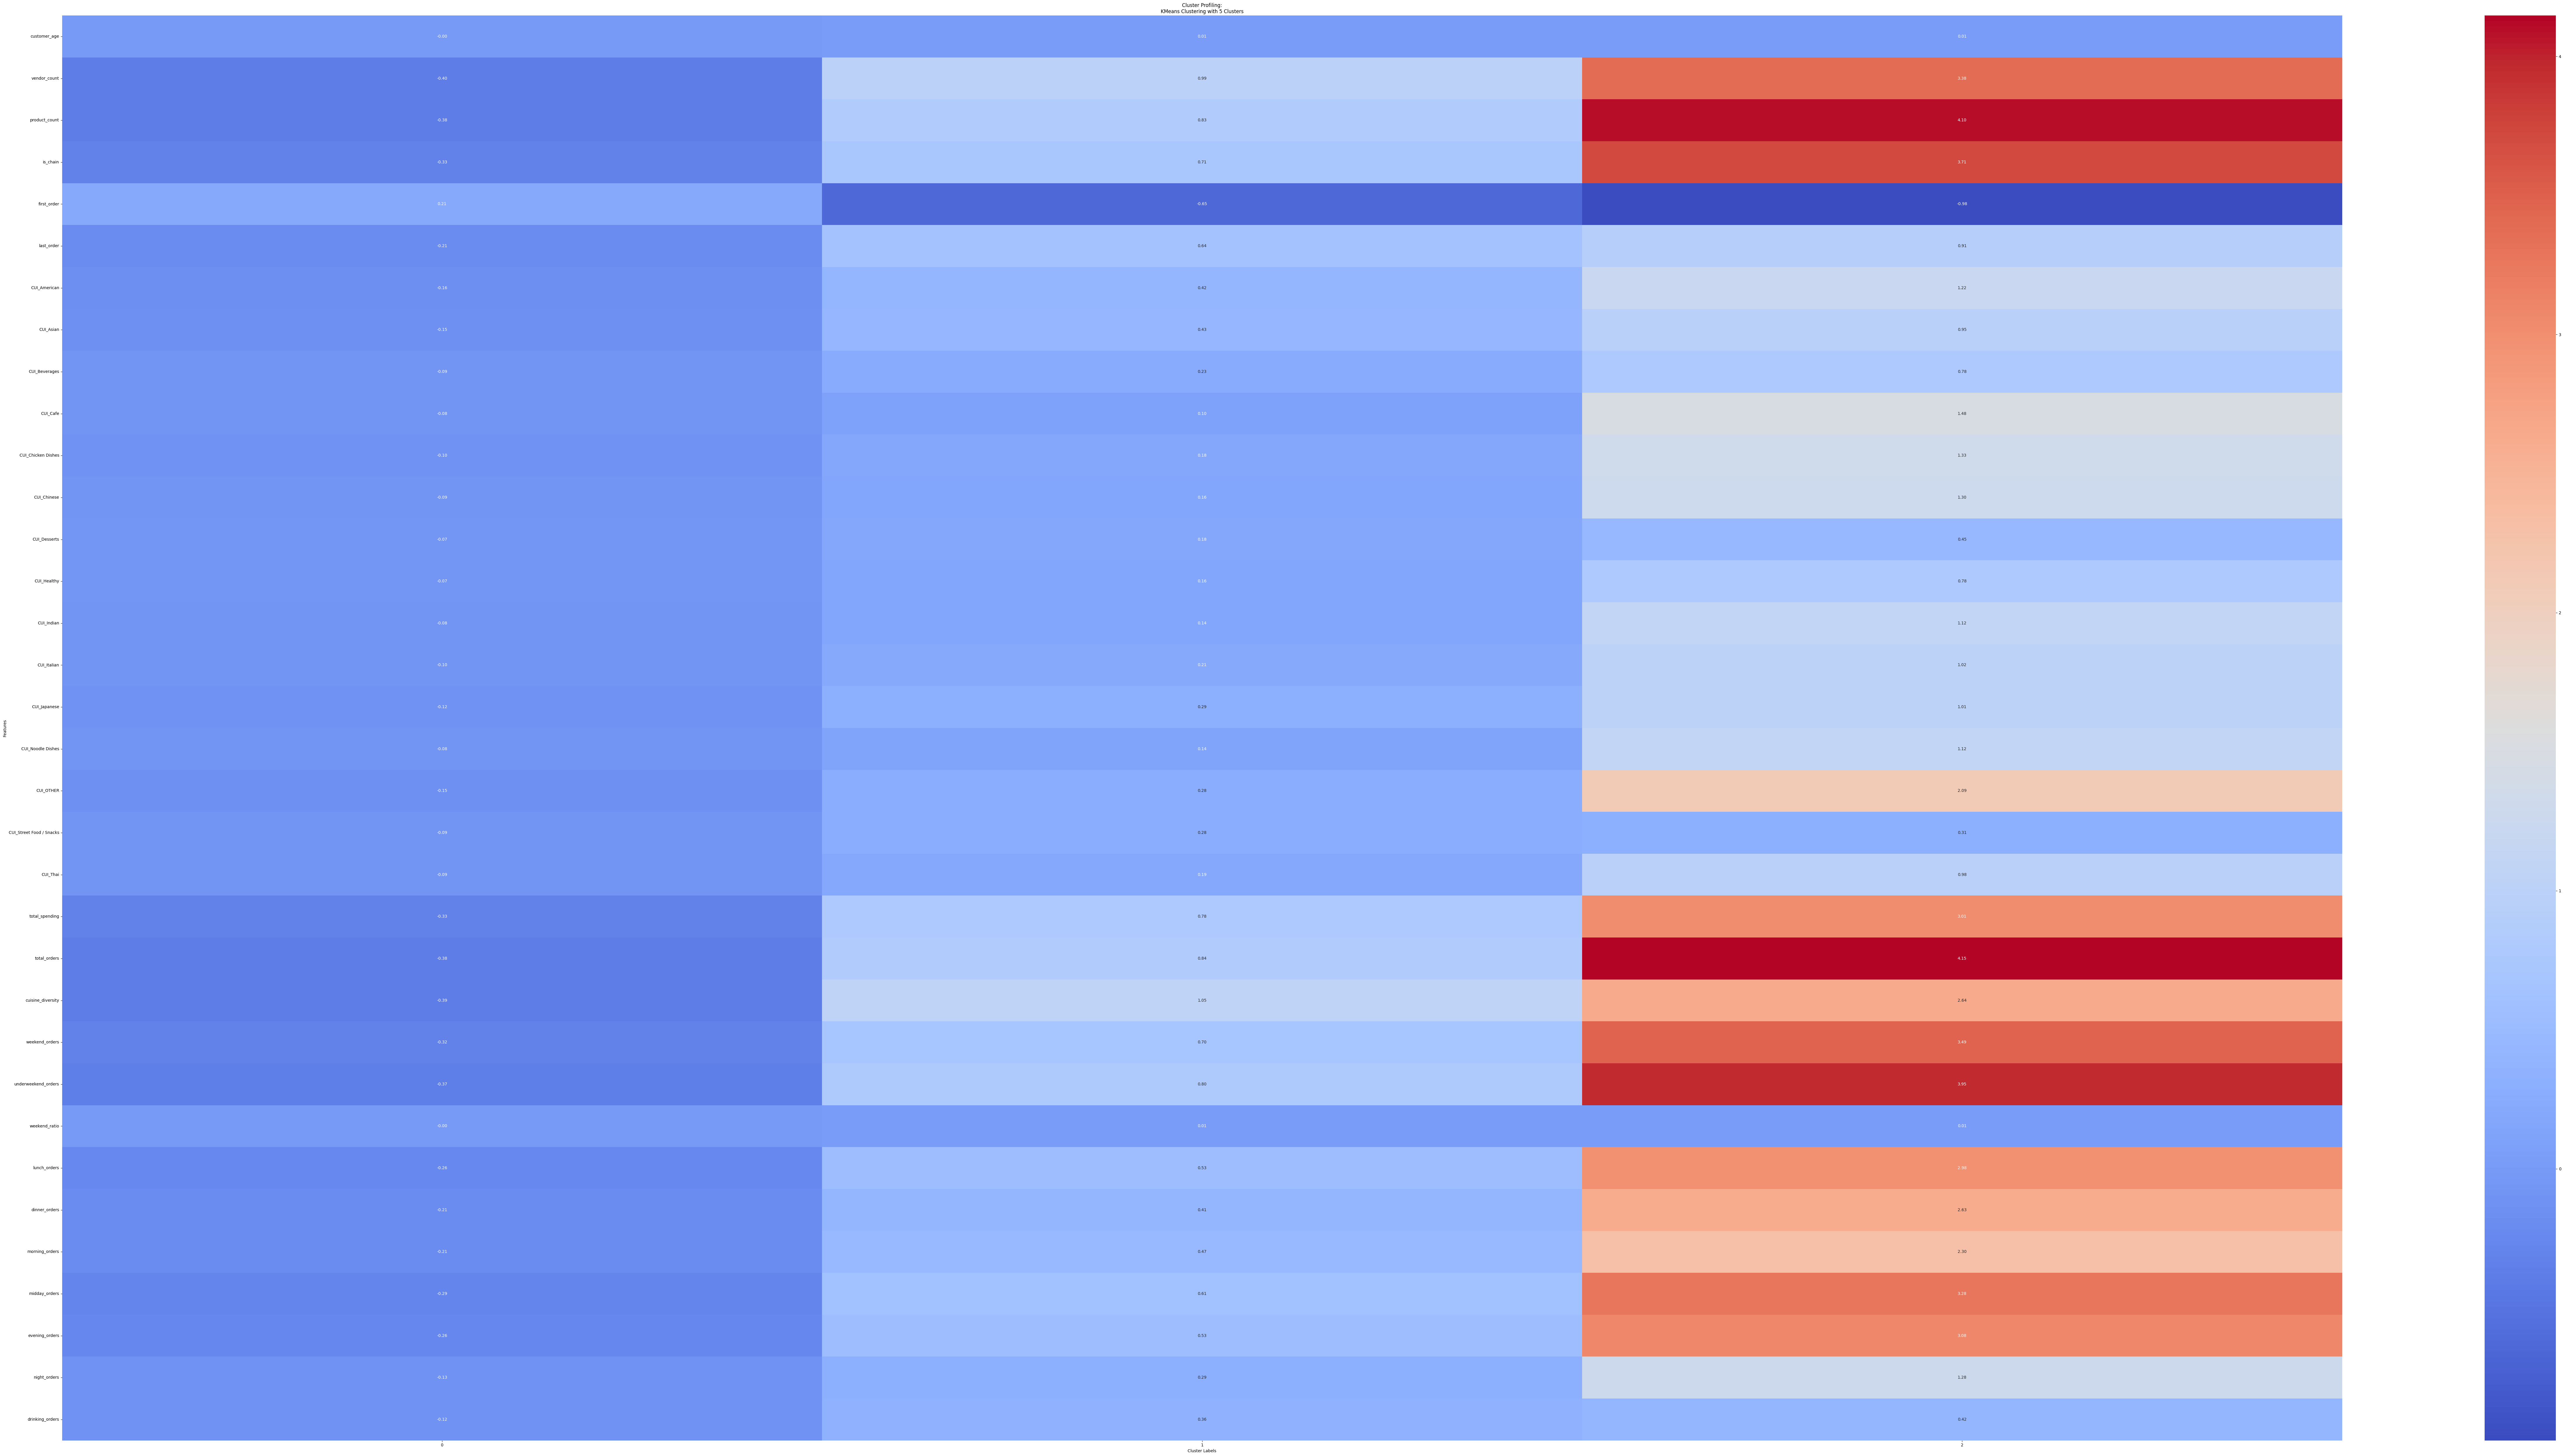

In [36]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


In [37]:
#K-means with K=4 for dropped numeric data types
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_scaled_dropped)
km_labels = kmclust.fit_predict(df_scaled_dropped)

# Characterizing the final clusters
df_concat = pd.concat((df_scaled_dropped, pd.Series(km_labels, name='labels', index=df_scaled_dropped.index)), axis=1)
df_concat.groupby('labels').mean()

customer_age  vendor_count  product_count  is_chain  first_order  \
labels                                                                     
0           0.021857      1.096237       0.964698  0.339013    -0.542588   
1           0.000294      1.005415       0.860897  0.910973    -0.687042   
2          -0.002374     -0.392543      -0.378052 -0.328232     0.210496   
3           0.016200      3.518260       4.405728  4.172132    -0.993452   

        last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
labels                                                                ...   
0         0.642377      0.636630   2.062667       0.947433 -0.118346  ...   
1         0.632244      0.320968  -0.154439      -0.034403  0.183955  ...   
2        -0.206001     -0.152356  -0.157237      -0.094691 -0.079959  ...   
3         0.919708      1.218585   0.450506       0.741033  1.878007  ...   

        weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
labels                                                                     
0             0.640704             0.771774      -0.010070      0.249826   
1             0.790972             0.888398       0.023621      0.678436   
2            -0.318286            -0.364383      -0.003977     -0.250099   
3             3.759619             4.309238       0.005300      3.313264   

        dinner_orders  morning_orders  midday_orders  evening_orders  \
labels                                                                 
0           -0.380393        1.073488       0.211387       -0.451009   
1            0.820202        0.223987       0.807528        1.005200   
2           -0.215779       -0.204958      -0.282676       -0.262238   
3            2.999603        2.437511       3.673036        3.553465   

        night_orders  drinking_orders  
labels                                 
0           0.310714         2.156104  
1           0.304937        -0.273260  
2          -0.122268        -0.127945  
3           1.244492        -0.029075  

[4 rows x 34 columns]

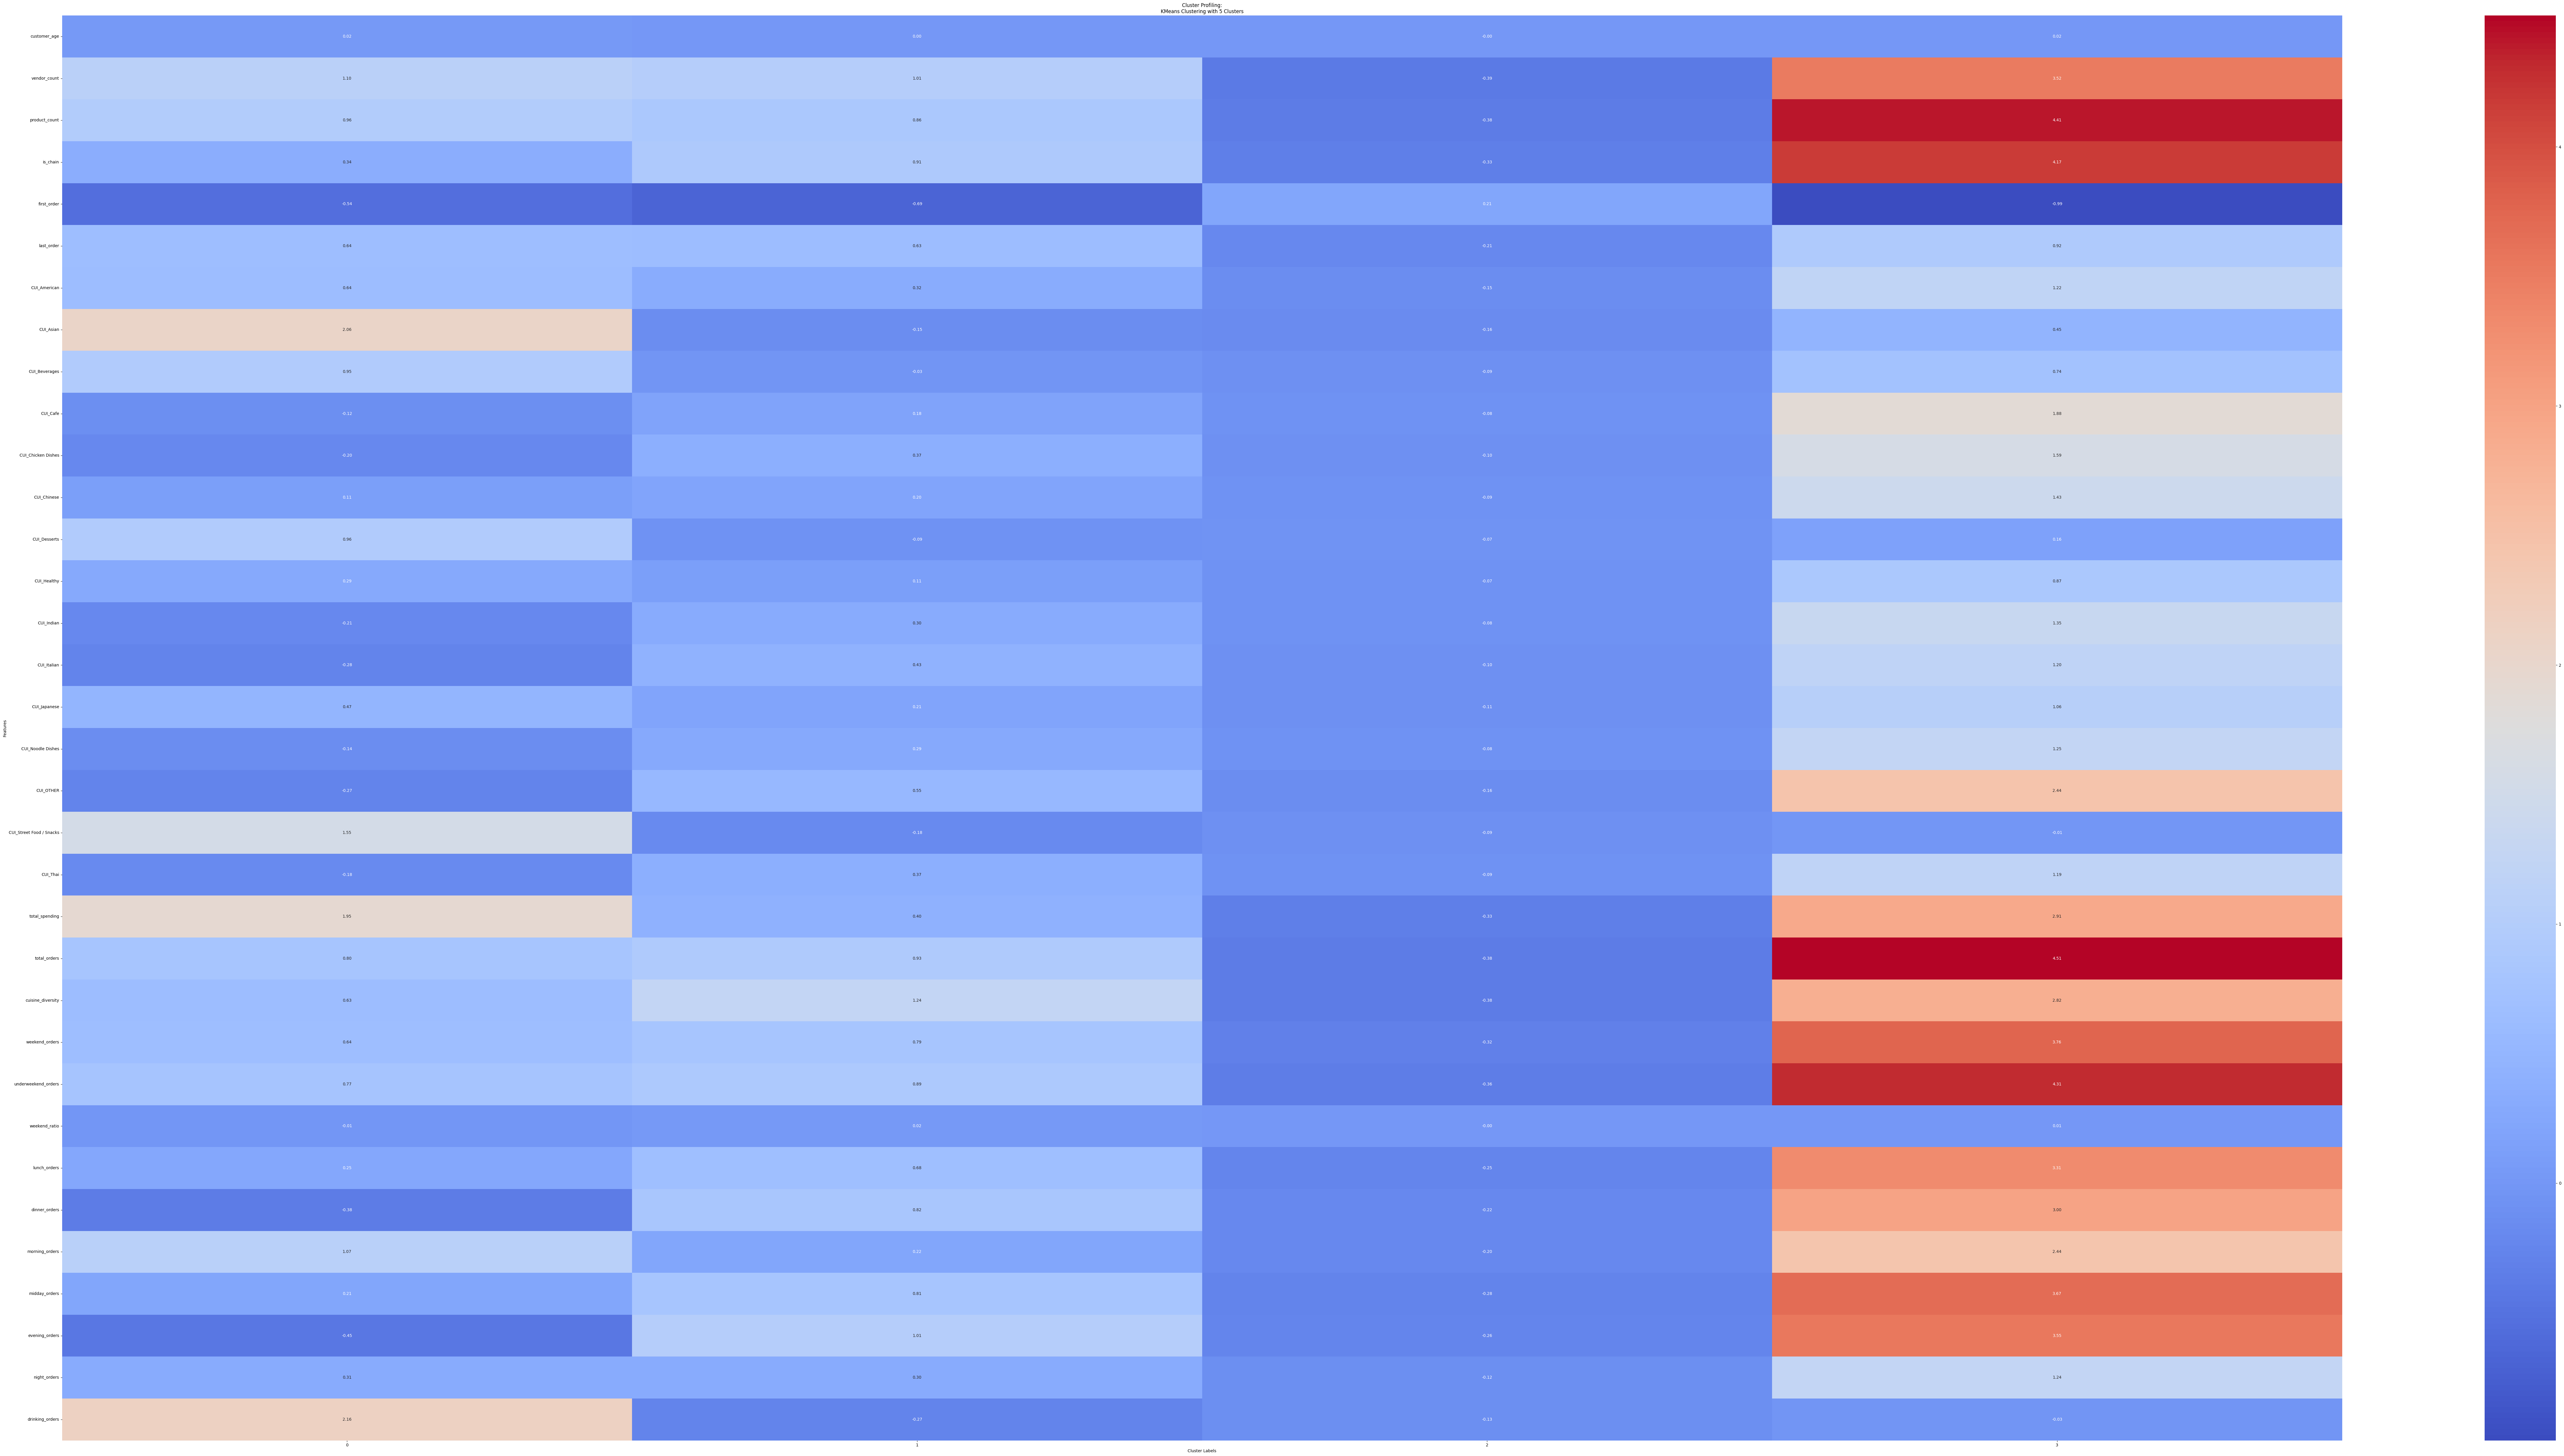

In [38]:
# Prepare data for heatmap
km_profile = df_concat.groupby('labels').mean().T

# Ensure numeric values
km_profile = km_profile.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot heatmap
fig, ax = plt.subplots(figsize=(100, 50))
sns.heatmap(km_profile,
            annot=True,          # Show values in cells
            fmt=".2f",           # Format values to 2 decimal places
            cmap="coolwarm",     # Color map
            ax=ax)

# Add labels and title
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Features")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters")

plt.tight_layout()
plt.show()


In [ ]:
#K - medoids

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d80cf8a3-0707-4865-ba36-9382bf28b032' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>